# Drift Detection using Online Learning


## Importing libraries and declaring functions

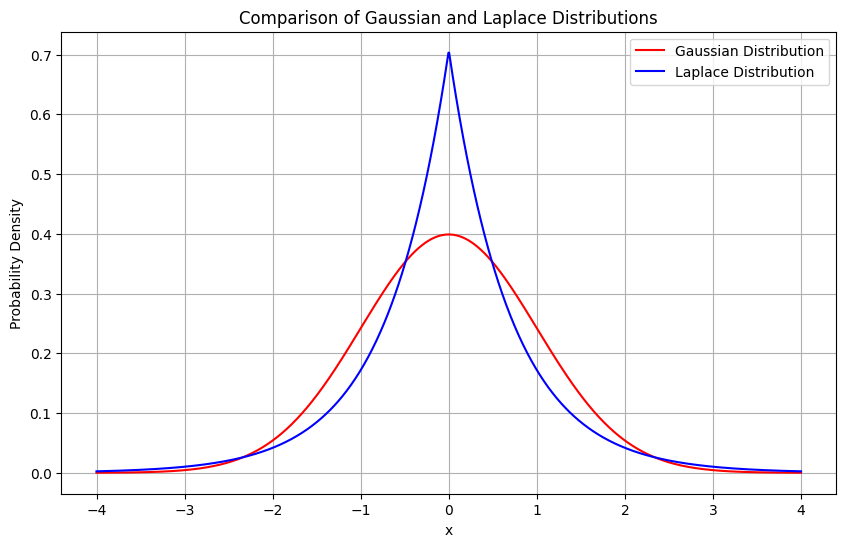

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, laplace

# Define the range for the x-axis
x = np.linspace(-4, 4, 1000)

# Parameters for the Gaussian (Normal) distribution
mu = 0  # Mean
sigma = 1  # Standard deviation

# Parameters for the Laplacian distribution
b = 1 / np.sqrt(2)  # Scale parameter for Laplace to have same variance as Gaussian
laplace_mu = 0  # Location parameter

# Generate the Gaussian and Laplacian distributions
gaussian = norm.pdf(x, mu, sigma)
laplacian = laplace.pdf(x, laplace_mu, b)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(x, gaussian, label='Gaussian Distribution', color='red')
plt.plot(x, laplacian, label='Laplace Distribution', color='blue')
plt.xlabel('x')
plt.ylabel('Probability Density')
plt.title('Comparison of Gaussian and Laplace Distributions')
plt.legend()
plt.grid(True)
plt.show()


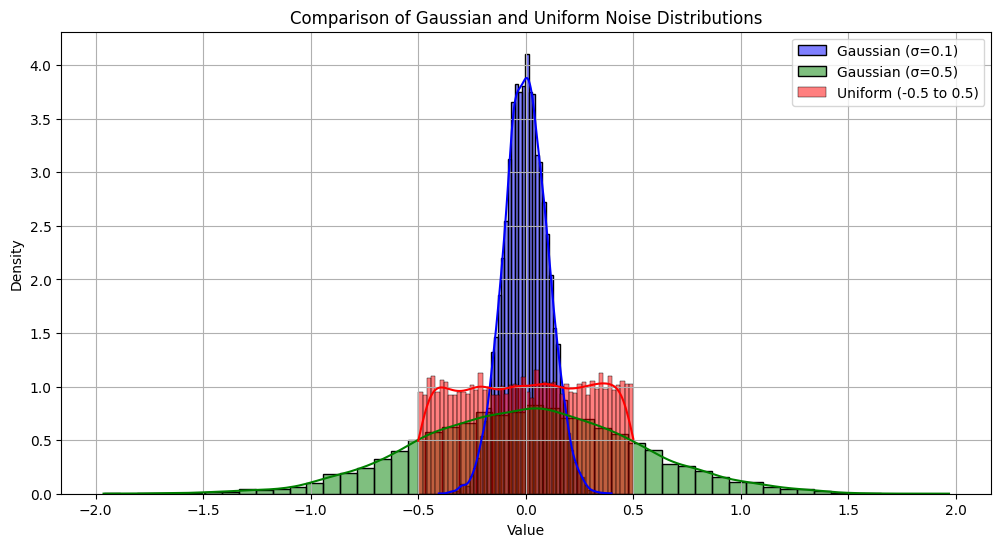

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Parameters
mean = 0
std_dev_1 = 0.1
std_dev_2 = 0.5
uniform_range = 0.5

# Generate data
x_gaussian_1 = np.random.normal(mean, std_dev_1, 10000)
x_gaussian_2 = np.random.normal(mean, std_dev_2, 10000)
x_uniform = np.random.uniform(-uniform_range, uniform_range, 10000)

# Create plot
plt.figure(figsize=(12, 6))

# Plot Gaussian distribution with std deviation 0.1
sns.histplot(x_gaussian_1, kde=True, color='blue', label=f'Gaussian (σ={std_dev_1})', stat='density', bins=50)

# Plot Gaussian distribution with std deviation 0.5
sns.histplot(x_gaussian_2, kde=True, color='green', label=f'Gaussian (σ={std_dev_2})', stat='density', bins=50)

# Plot Uniform distribution with range -0.5 to 0.5 (equivalent to std deviation of 0.5 for visual purposes)
sns.histplot(x_uniform, kde=True, color='red', label=f'Uniform (-{uniform_range} to {uniform_range})', stat='density', bins=50)

# Adding titles and labels
plt.title('Comparison of Gaussian and Uniform Noise Distributions')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
! pip install scikit-multiflow river==0.7.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 450.6/450.6 kB 4.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 846.0/846.0 kB 20.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for river: filename=river-0.7.0-cp310-cp310-linux_x86_64.whl size=2361234 sha256=67c60166a80fec7d43c28ee2b9d18f104565eac41ff9a2a6e233fed10984889a
  Stored in directory: /root/.cache/pip/wheels/71/e9/7e/105173d51ebb5262f6f2dc4f6a5003ec86365255e8fd989733
  Created wheel for scikit-multiflow: filename=scikit_multiflow-0.5.3-cp310-cp310-linux_x86_64.whl size=1254680 sha256=14b43b1a9f73e72209b6de09e1fe661efb95e5b5905b6d868a49f086bcf99a4e
  Stored in directory: /root/.cache/pip/wheels/6e/1b/56/45b17a6cf203d98000a45976cb0dd0c4c3f11960e6a505f231
Successfully built river scikit-multiflow


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from random import randint
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, IsolationForest
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score, precision_score, recall_score, f1_score

from river import metrics
from river.drift import DDM, ADWIN
from river import stream, tree, ensemble
from river import tree,neighbors,naive_bayes,ensemble,linear_model

In [ ]:
def remove_null_values(df):
    # Count the number of null values in the DataFrame
    num_null_values = df.isnull().sum().sum()

    # Remove rows with null values
    cleaned_df = df.dropna()

    # Output the number of null values removed
    print("Number of null values removed:", num_null_values)

    return cleaned_df

In [ ]:
pump18A_Data = pd.read_csv('/content/drive/MyDrive/DigitalTwin/Pump18A-196362-6.csv')
fumeHood_Data = pd.read_csv('/content/drive/MyDrive/DigitalTwin/FumeHood.csv')
nearKarlSussMid_Data = pd.read_csv('/content/drive/MyDrive/DigitalTwin/NearKarlSussMid.csv')

In [ ]:
print("Pump Columsn",pump18A_Data.columns )
print("FumeHood Columsn",fumeHood_Data.columns )
print("NearKarlSussMid Columsn",nearKarlSussMid_Data.columns )

Pump Columsn Index(['timestamp', 'temperature'], dtype='object')
FumeHood Columsn Index(['timestamp', 'airflow', 'temperature', 'humidity'], dtype='object')
NearKarlSussMid Columsn Index(['timestamp', 'humidity', 'temperature'], dtype='object')


In [ ]:
# Remove all the null value records from the dataset
fumeHood_Data = remove_null_values(fumeHood_Data)
nearKarlSussMid_Data = remove_null_values(nearKarlSussMid_Data)
pump18A_Data = remove_null_values(pump18A_Data)

Number of null values removed: 51
Number of null values removed: 18
Number of null values removed: 2208


In [ ]:
# def inject_noise(data, noise_ratio=0.1):
#     num_noise_rows = int(len(data) * noise_ratio)
#     noise_indices = np.random.choice(data.index, num_noise_rows, replace=False)
#     stats = data.describe().loc[['mean', 'std', '50%']]  # Include median to decide noise direction

#     noisy_data = data.copy()
#




noisy_data['label'] = 'non_anomaly'  # Initialize label

#     for col in ['airflow', 'temperature', 'humidity']:
#         median = stats.loc['50%', col]
#         std_dev = stats.loc['std', col]
#         noise_magnitude = 0.3 * std_dev  # Tailored noise level

#         # Apply noise depending on the median to control direction
#         noise = np.where(
#             noisy_data.loc[noise_indices, col] > median,
#             np.random.normal(-noise_magnitude, 0.1 * std_dev, num_noise_rows),
#             np.random.normal(noise_magnitude, 0.1 * std_dev, num_noise_rows)
#         )

#         noisy_data.loc[noise_indices, col] += noise

#         # Optional: Clipping to prevent unrealistic values
#         lower_bound = max(0, noisy_data[col].min() - 3 * std_dev)  # Assuming positive values only
#         upper_bound = noisy_data[col].max() + 3 * std_dev
#         noisy_data[col] = noisy_data[col].clip(lower_bound, upper_bound)

#     noisy_data.loc[noise_indices, 'label'] = 'anomaly'

#     return noisy_data



# fumeHood_Data_with_labels = inject_noise(fumeHood_Data, noise_ratio=0.1)

# # Create separate DataFrames for anomalies and non-anomalies
# anomaly_data = fumeHood_Data_with_labels[fumeHood_Data_with_labels['label'] == 'anomaly']
# non_anomaly_data = fumeHood_Data_with_labels[fumeHood_Data_with_labels['label'] == 'no_anomaly']

# # Plot the data for each modality
# plt.figure(figsize=(12, 18))

# # Plot temperature data
# plt.subplot(3, 1, 1)
# plt.plot(non_anomaly_data.index, non_anomaly_data['temperature'], 'bo', label='Non-Anomalies')
# plt.plot(anomaly_data.index, anomaly_data['temperature'], 'ro', label='Anomalies')
# plt.xlabel('Sample Number')
# plt.ylabel('Temperature')
# plt.title('FumeHood Temperature - Anomalies vs Non-Anomalies')
# plt.legend()

# # Plot humidity data
# plt.subplot(3, 1, 2)
# plt.plot(non_anomaly_data.index, non_anomaly_data['humidity'], 'bo', label='Non-Anomalies')
# plt.plot(anomaly_data.index, anomaly_data['humidity'], 'ro', label='Anomalies')
# plt.xlabel('Sample Number')
# plt.ylabel('Humidity')
# plt.title('FumeHood Humidity - Anomalies vs Non-Anomalies')
# plt.legend()

# # Plot airflow data
# plt.subplot(3, 1, 3)
# plt.plot(non_anomaly_data.index, non_anomaly_data['airflow'], 'bo', label='Non-Anomalies')
# plt.plot(anomaly_data.index, anomaly_data['airflow'], 'ro', label='Anomalies')
# plt.xlabel('Sample Number')
# plt.ylabel('Airflow')
# plt.title('FumeHood Airflow - Anomalies vs Non-Anomalies')
# plt.legend()

# plt.tight_layout()
# plt.show()


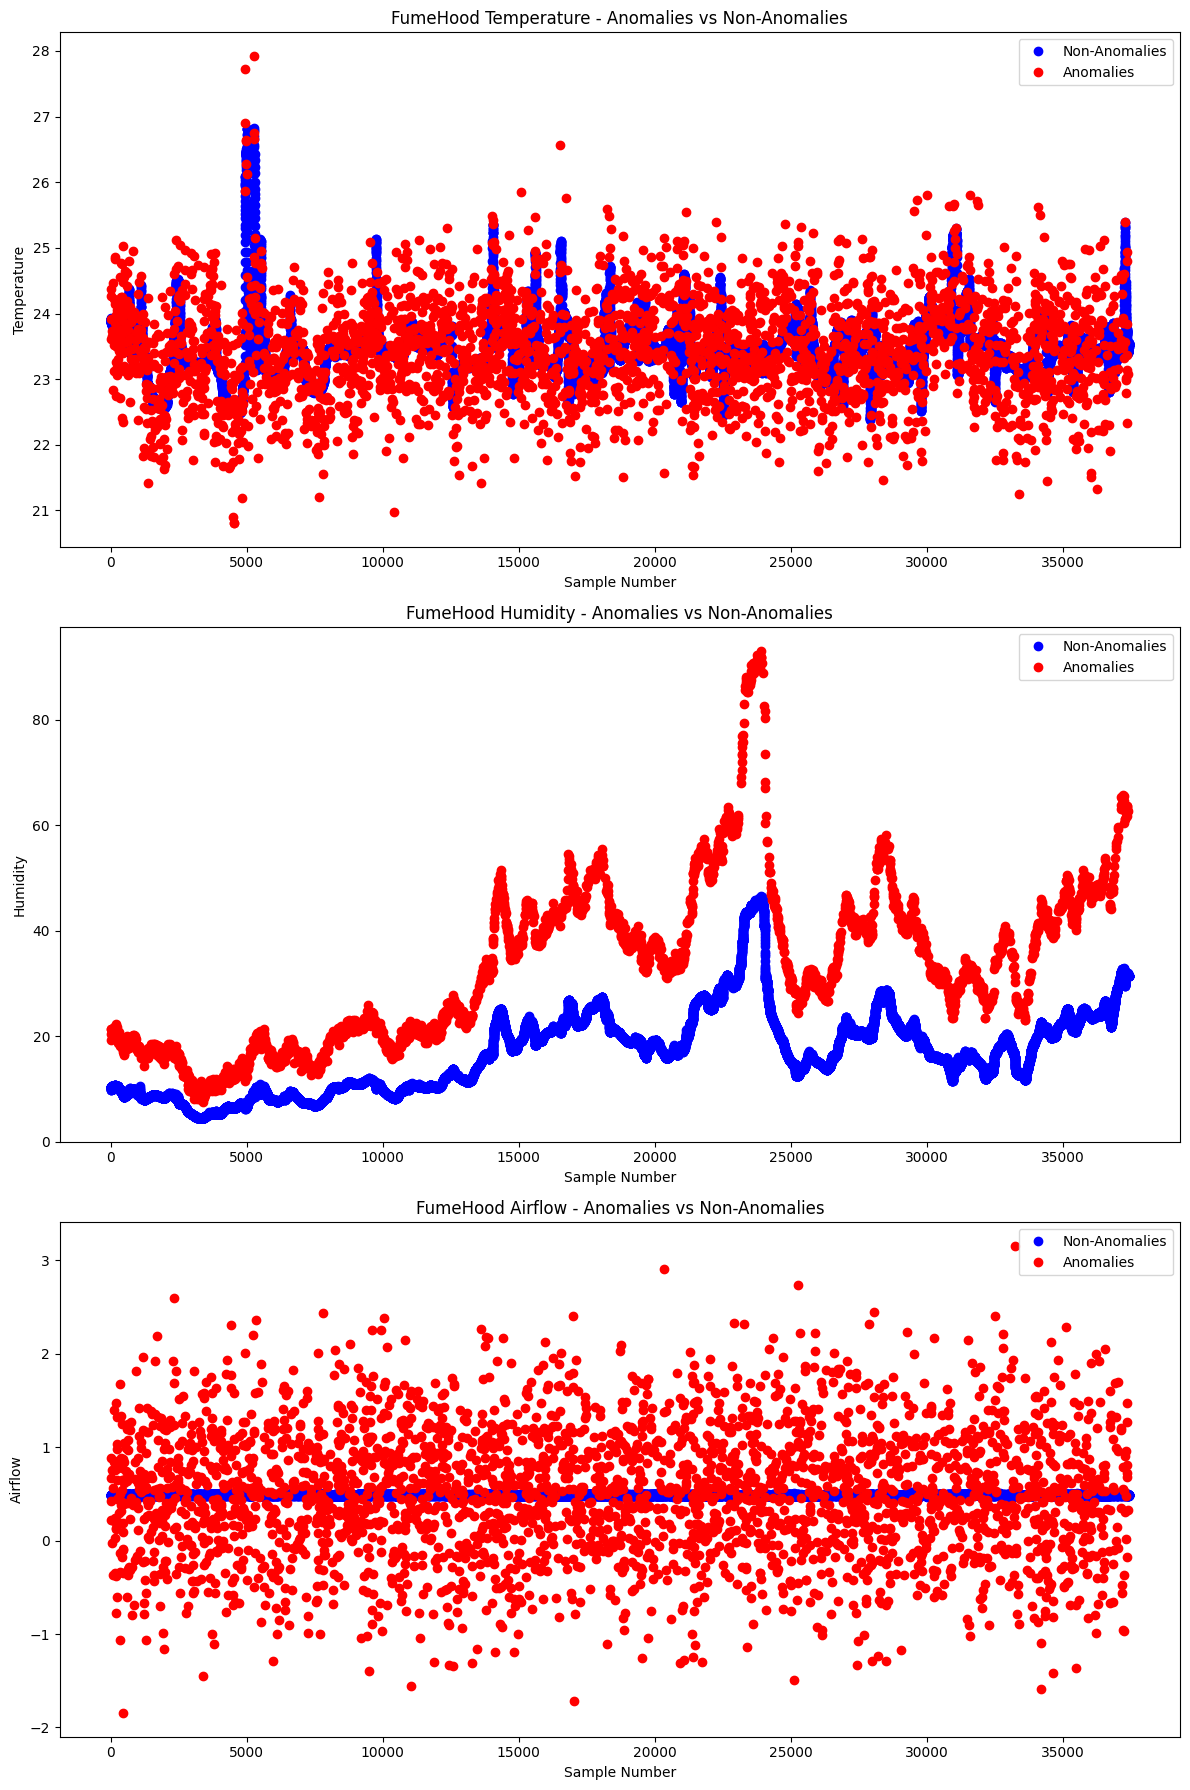

In [ ]:
def inject_noise(data, noise_ratio=0.08):
    # Create a copy of the original data
    noisy_data = data.copy()

    # Calculate the number of rows to inject noise
    num_noise_rows = int(len(data) * noise_ratio)

    # Select random rows to inject noise
    noise_indices = np.random.choice(data.index, num_noise_rows, replace=False)

    # Add noise to selected rows for temperature, humidity, and airflow columns
    for idx in noise_indices:
        # Calculate mean and standard deviation for each column
        mean_temp = data.loc[idx, 'temperature'].mean()

        mean_humidity = data.loc[idx, 'humidity'].mean()
        mean_airflow = data.loc[idx, 'airflow'].mean()

        std_temp = 0.7
        std_humidity = 0.7
        std_airflow =0.7

        # Add noise to temperature, humidity, and airflow columns
        k=np.random.normal(0, std_temp)


        noisy_data.loc[idx, 'temperature'] += np.random.normal(0, std_temp)
        noisy_data.loc[idx, 'humidity'] += np.random.normal(mean_humidity, std_humidity)
        noisy_data.loc[idx, 'airflow'] += np.random.normal(0, std_airflow)

    # Create a new column 'label' to indicate anomalies
    noisy_data['label'] = 'no_anomaly'  # Initialize all labels as 'no_anomaly'
    noisy_data.loc[noise_indices, 'label'] = 'anomaly'  # Update label for noisy rows

    return noisy_data

# Example usage:
# Assuming fumeHood_Data is your original DataFrame
fumeHood_Data_with_labels = inject_noise(fumeHood_Data, noise_ratio=0.08)

# Create separate DataFrames for anomalies and non-anomalies
anomaly_data = fumeHood_Data_with_labels[fumeHood_Data_with_labels['label'] == 'anomaly']
non_anomaly_data = fumeHood_Data_with_labels[fumeHood_Data_with_labels['label'] == 'no_anomaly']

# Plot the data for each modality
plt.figure(figsize=(12, 18))

# Plot temperature data
plt.subplot(3, 1, 1)
plt.plot(non_anomaly_data.index, non_anomaly_data['temperature'], 'bo', label='Non-Anomalies')
plt.plot(anomaly_data.index, anomaly_data['temperature'], 'ro', label='Anomalies')
plt.xlabel('Sample Number')
plt.ylabel('Temperature')
plt.title('FumeHood Temperature - Anomalies vs Non-Anomalies')
plt.legend()

# Plot humidity data
plt.subplot(3, 1, 2)
plt.plot(non_anomaly_data.index, non_anomaly_data['humidity'], 'bo', label='Non-Anomalies')
plt.plot(anomaly_data.index, anomaly_data['humidity'], 'ro', label='Anomalies')
plt.xlabel('Sample Number')
plt.ylabel('Humidity')
plt.title('FumeHood Humidity - Anomalies vs Non-Anomalies')
plt.legend()

# Plot airflow data
plt.subplot(3, 1, 3)
plt.plot(non_anomaly_data.index, non_anomaly_data['airflow'], 'bo', label='Non-Anomalies')
plt.plot(anomaly_data.index, anomaly_data['airflow'], 'ro', label='Anomalies')
plt.xlabel('Sample Number')
plt.ylabel('Airflow')
plt.title('FumeHood Airflow - Anomalies vs Non-Anomalies')
plt.legend()

plt.tight_layout()
plt.show()


## For Pump Data

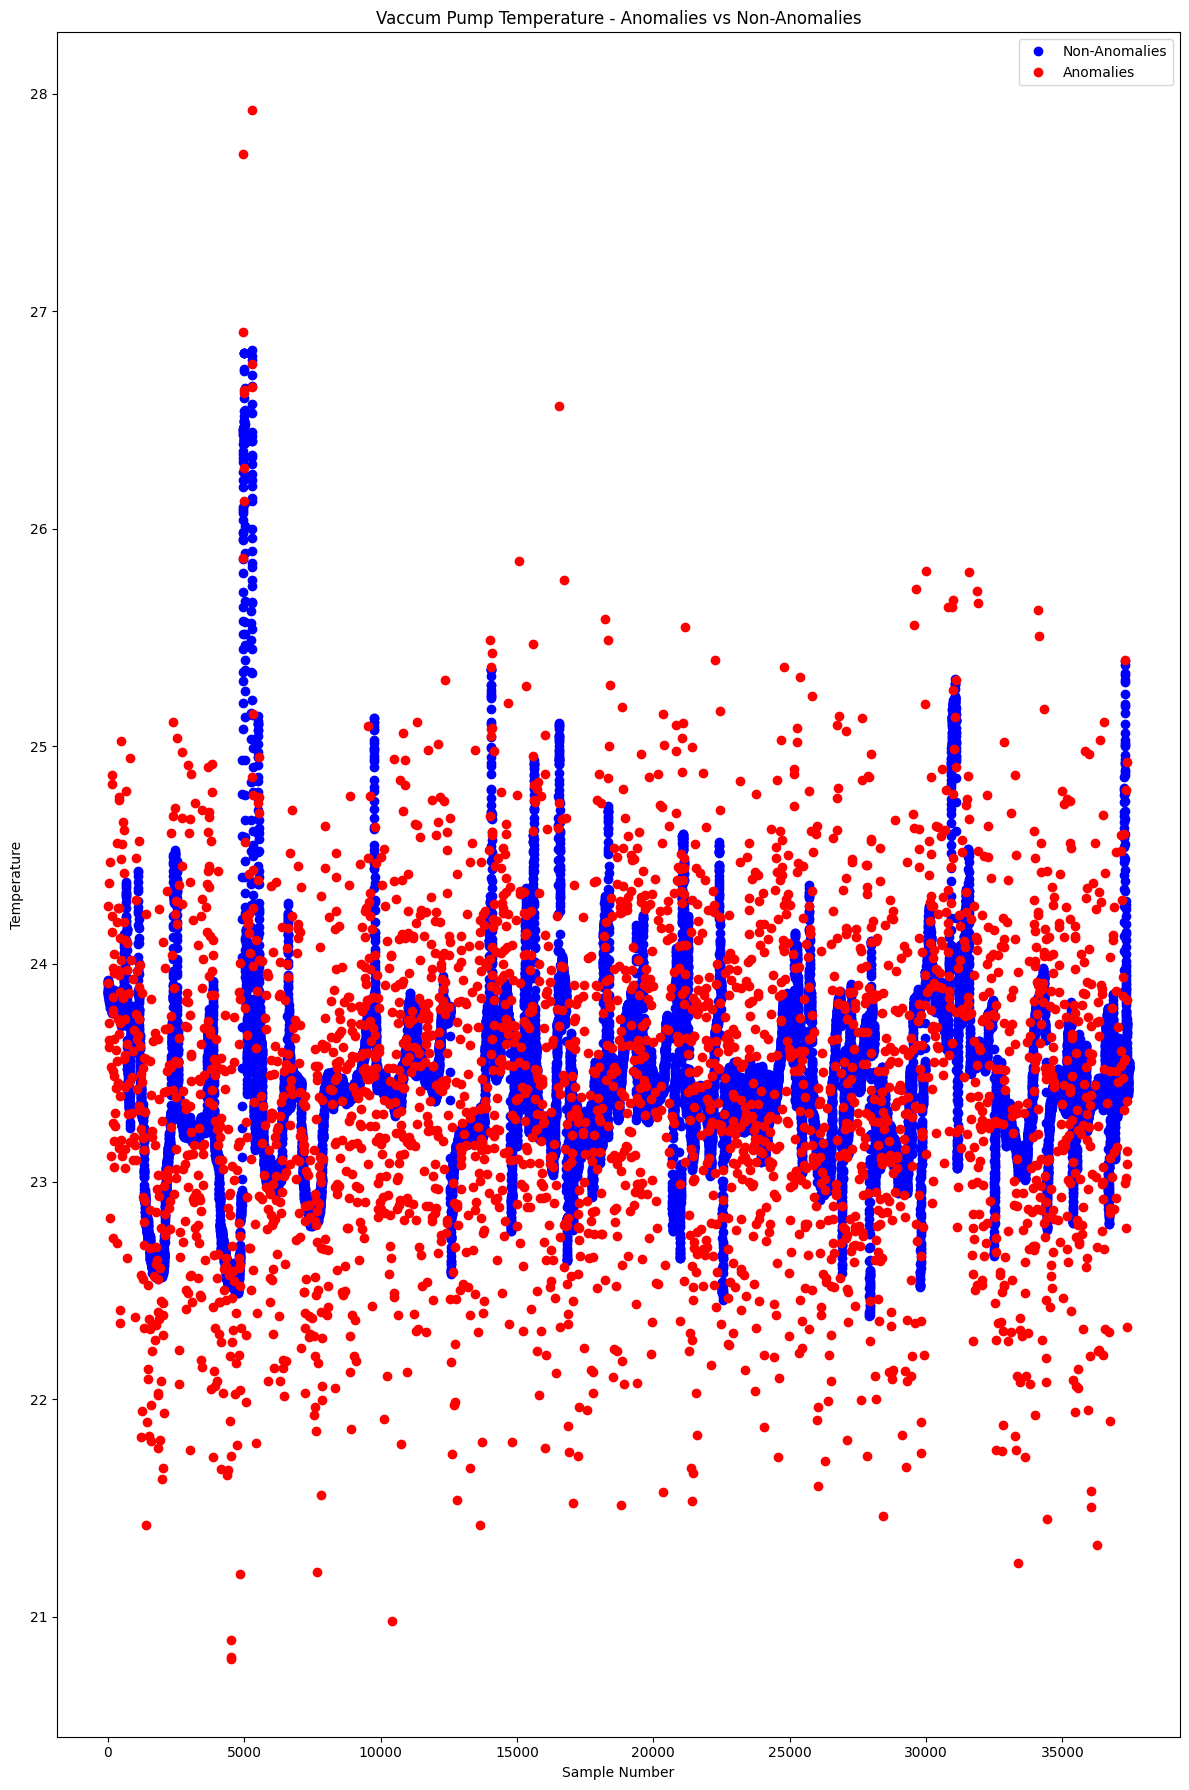

In [ ]:
def inject_noise_pump(data, noise_ratio=0.1):
    # Create a copy of the original data
    noisy_data = data.copy()

    # Calculate the number of rows to inject noise
    num_noise_rows = int(len(data) * noise_ratio)

    # Select random rows to inject noise
    noise_indices = np.random.choice(data.index, num_noise_rows, replace=False)

    # Add noise to selected rows for temperature, humidity, and airflow columns
    for idx in noise_indices:
        # Calculate mean and standard deviation for each column
        mean_temp = data.loc[idx, 'temperature'].mean()



        std_temp = 0.9

        # Add noise to temperature, humidity, and airflow columns
        k=np.random.normal(0, std_temp)


        noisy_data.loc[idx, 'temperature'] += np.random.normal(0, std_temp)



    # Create a new column 'label' to indicate anomalies
    noisy_data['label'] = 'no_anomaly'  # Initialize all labels as 'no_anomaly'
    noisy_data.loc[noise_indices, 'label'] = 'anomaly'  # Update label for noisy rows

    return noisy_data

# Example usage:
# Assuming fumeHood_Data is your original DataFrame
Pump_Data_with_labels = inject_noise_pump(pump18A_Data, noise_ratio=0.1)

# Create separate DataFrames for anomalies and non-anomalies
anomaly_data_pump = Pump_Data_with_labels[Pump_Data_with_labels['label'] == 'anomaly']
non_anomaly_data_pump = Pump_Data_with_labels[Pump_Data_with_labels['label'] == 'no_anomaly']

# Plot the data for each modality
plt.figure(figsize=(12, 18))

# Plot temperature data

plt.plot(non_anomaly_data.index, non_anomaly_data['temperature'], 'bo', label='Non-Anomalies')
plt.plot(anomaly_data.index, anomaly_data['temperature'], 'ro', label='Anomalies')
plt.xlabel('Sample Number')
plt.ylabel('Temperature')
plt.title('Vaccum Pump Temperature - Anomalies vs Non-Anomalies')
plt.legend()


plt.tight_layout()
plt.show()


## Karl Suss

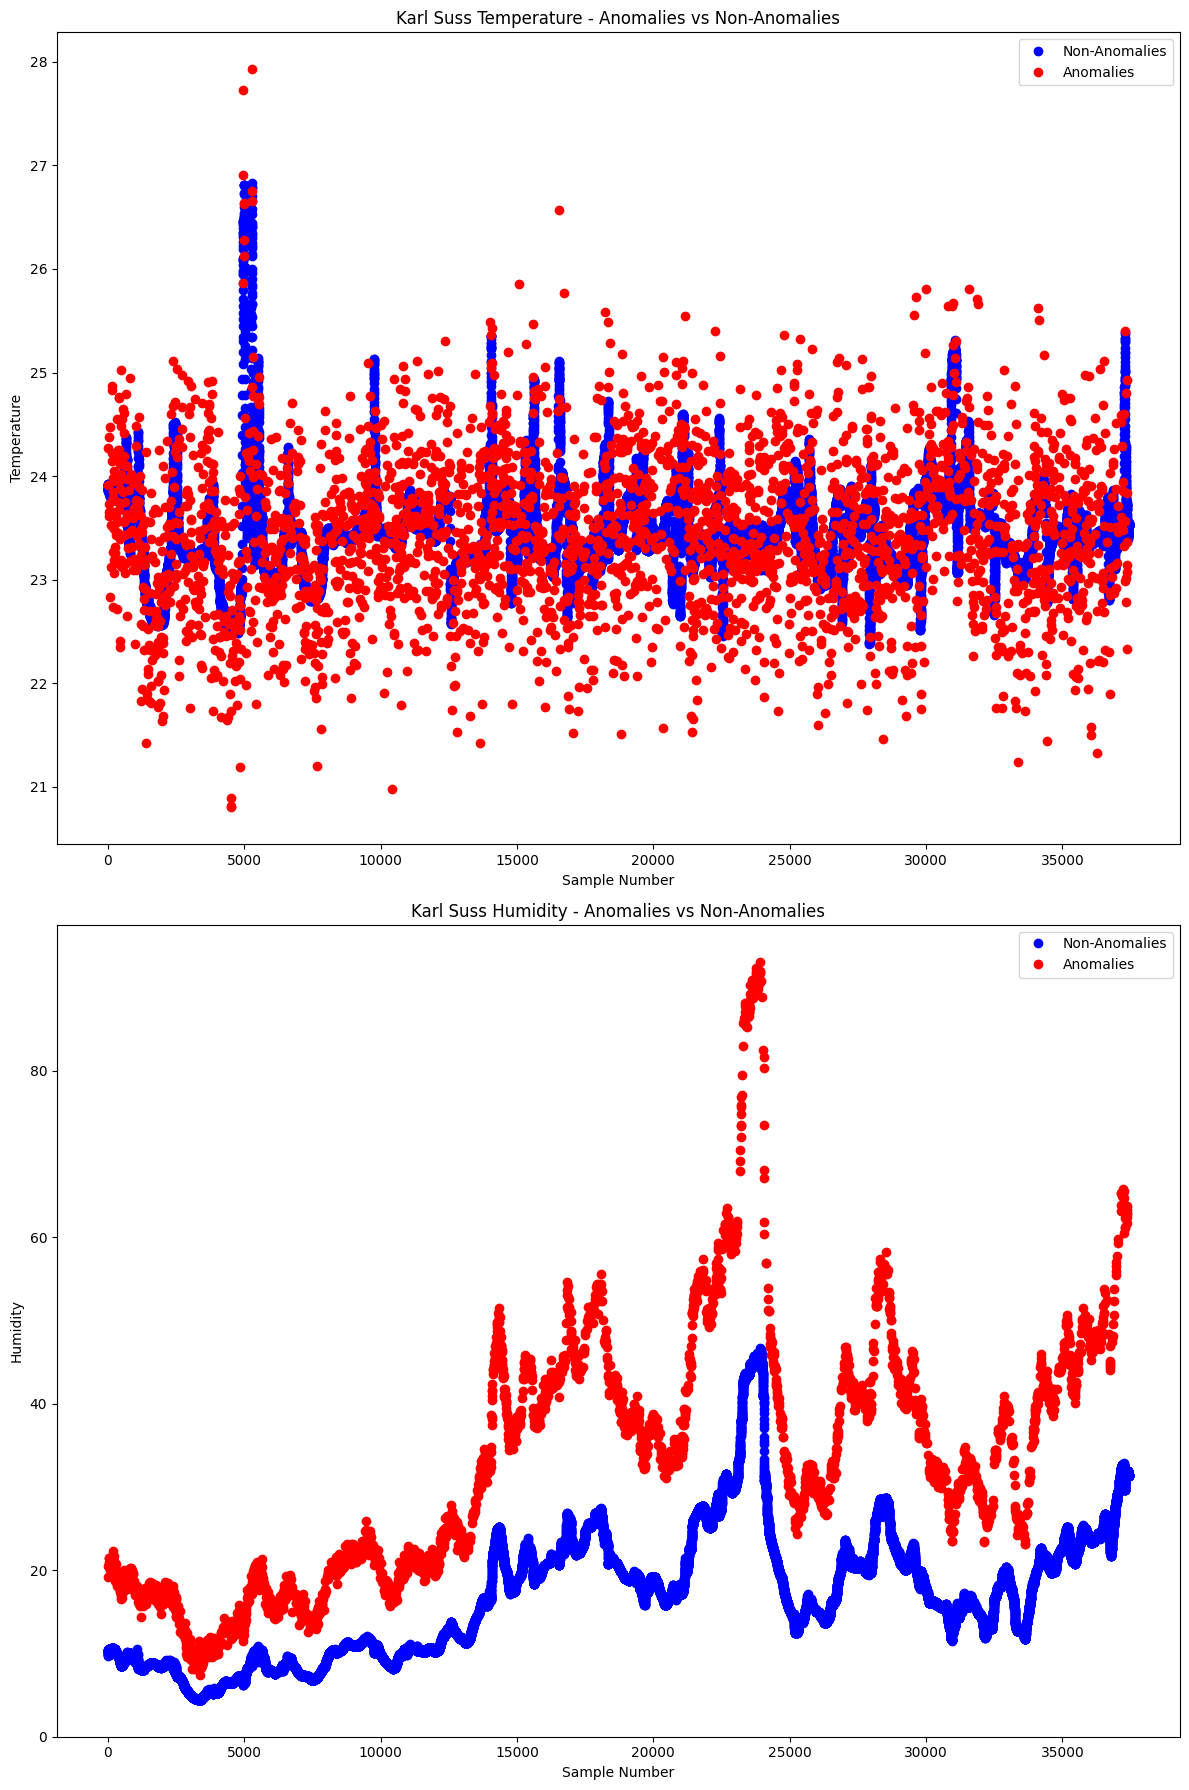

In [ ]:
def inject_noise_KarlSuss(data, noise_ratio=0.1):
    # Create a copy of the original data
    noisy_data = data.copy()

    # Calculate the number of rows to inject noise
    num_noise_rows = int(len(data) * noise_ratio)

    # Select random rows to inject noise
    noise_indices = np.random.choice(data.index, num_noise_rows, replace=False)

    # Add noise to selected rows for temperature, humidity, and airflow columns
    for idx in noise_indices:
        # Calculate mean and standard deviation for each column
        mean_temp = data.loc[idx, 'temperature'].mean()
        mean_humidity = data.loc[idx, 'humidity'].mean()


        std_temp = 0.9
        std_humidity = 0.9


        # Add noise to temperature, humidity, and airflow columns
        k=np.random.normal(0, std_temp)


        noisy_data.loc[idx, 'temperature'] += np.random.normal(0, std_temp)
        noisy_data.loc[idx, 'humidity'] += np.random.normal(0, std_humidity)


    # Create a new column 'label' to indicate anomalies
    noisy_data['label'] = 'no_anomaly'  # Initialize all labels as 'no_anomaly'
    noisy_data.loc[noise_indices, 'label'] = 'anomaly'  # Update label for noisy rows

    return noisy_data

# Example usage:
# Assuming fumeHood_Data is your original DataFrame
karlsuss_Data_with_labels = inject_noise_pump(nearKarlSussMid_Data, noise_ratio=0.1)

# Create separate DataFrames for anomalies and non-anomalies
anomaly_data_karlsuss = karlsuss_Data_with_labels[karlsuss_Data_with_labels['label'] == 'anomaly']
non_anomaly_data_karlsuss = karlsuss_Data_with_labels[karlsuss_Data_with_labels['label'] == 'no_anomaly']

# Plot the data for each modality
plt.figure(figsize=(12, 18))

# Plot temperature data
plt.subplot(2, 1, 1)
plt.plot(non_anomaly_data.index, non_anomaly_data['temperature'], 'bo', label='Non-Anomalies')
plt.plot(anomaly_data.index, anomaly_data['temperature'], 'ro', label='Anomalies')
plt.xlabel('Sample Number')
plt.ylabel('Temperature')
plt.title('Karl Suss Temperature - Anomalies vs Non-Anomalies')
plt.legend()

# Plot humidity data
plt.subplot(2, 1, 2)
plt.plot(non_anomaly_data.index, non_anomaly_data['humidity'], 'bo', label='Non-Anomalies')
plt.plot(anomaly_data.index, anomaly_data['humidity'], 'ro', label='Anomalies')
plt.xlabel('Sample Number')
plt.ylabel('Humidity')
plt.title('Karl Suss Humidity - Anomalies vs Non-Anomalies')
plt.legend()



plt.tight_layout()
plt.show()


In [ ]:
def train_and_plot_anomaly_detection_models(data, datasetName):
    # Separate features (X) and labels (y)
    X = data.drop(columns=['label'])
    y = data['label']

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=24)

    # Initialize models
    models = [
        ("Random Forest", RandomForestClassifier(max_depth=10, min_samples_split=10, random_state=42)),
        ("Decision Tree", DecisionTreeClassifier(max_depth=10, min_samples_split=10, random_state=42))
    ]

    # Create subplots for each model
    fig, axes = plt.subplots(len(models), 1, figsize=(10, 6*len(models)))

    for idx, (name, model) in enumerate(models):
        # Fit the model
        model.fit(X_train, y_train)

        # Calculate accuracy over time for training data
        acc_train = []
        acc_sum_train = 0
        y_pred_train = model.predict(X_train)
        for i in range(len(y_train)):
            if y_train.iloc[i] == y_pred_train[i]:
                acc_sum_train += 1
            accuracy = acc_sum_train / (i + 1)
            acc_train.append(accuracy)

        # Calculate accuracy over time for test data
        acc_test = []
        acc_sum_test = 0
        y_pred_test = model.predict(X_test)
        for i in range(len(y_test)):
            if y_test.iloc[i] == y_pred_test[i]:
                acc_sum_test += 1
            accuracy = acc_sum_test / (i + 1)
            acc_test.append(accuracy)

        # Plot accuracy over time for both training and test data
        axes[idx].plot(range(len(acc_train)), acc_train, label='Train Accuracy', linestyle='-')
        axes[idx].plot(range(len(acc_train), len(acc_train) + len(acc_test)), acc_test, label='Test Accuracy', linestyle='-')

        # Mark the point where test data starts
        axes[idx].scatter(len(y_train), acc_test[0], s=100, c='r')
        axes[idx].text(len(y_train), acc_test[0] + 0.005, 'Test Set Starts', c='r')

        axes[idx].set_title(f"{name} Anomaly Detection for {datasetName} dataset")
        axes[idx].set_xlabel('Timestamp')
        axes[idx].set_ylabel('Accuracy')
        axes[idx].legend()

    plt.tight_layout()
    plt.show()


<ipython-input-117-744980a346c4>:55: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  plt.tight_layout()


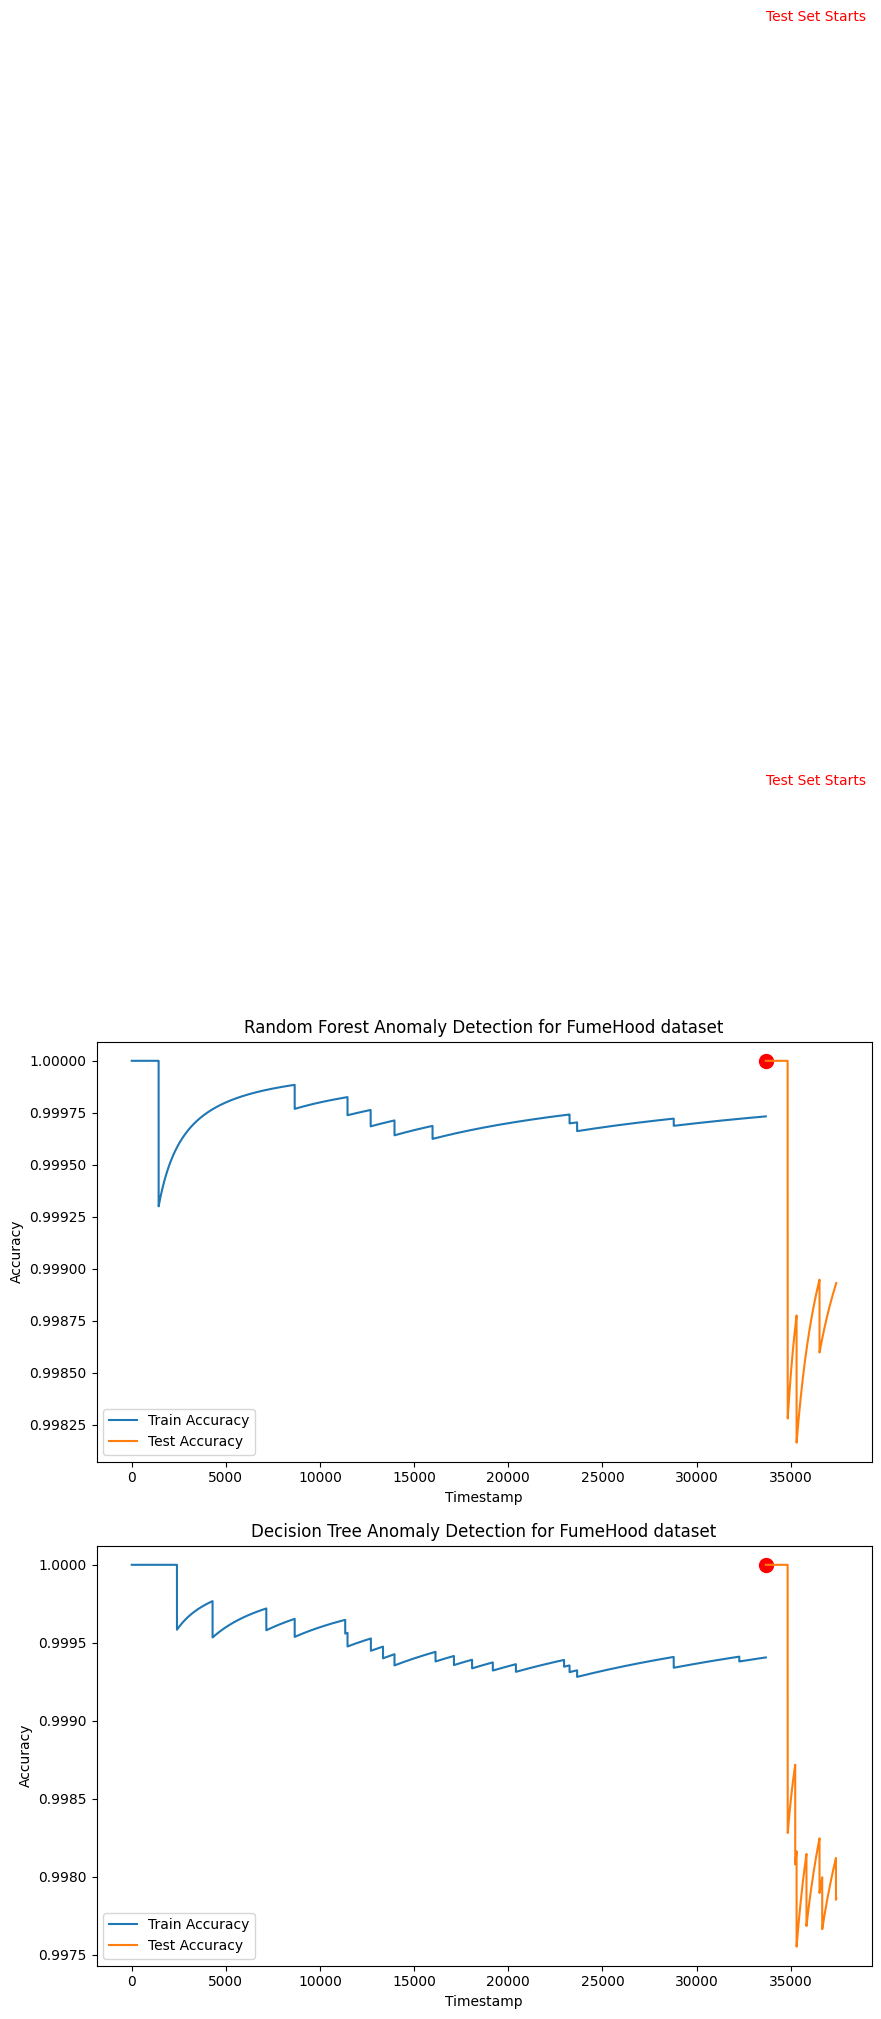

In [ ]:
train_and_plot_anomaly_detection_models(fumeHood_Data_with_labels, "FumeHood")

<ipython-input-120-c13dc935ab5e>:55: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


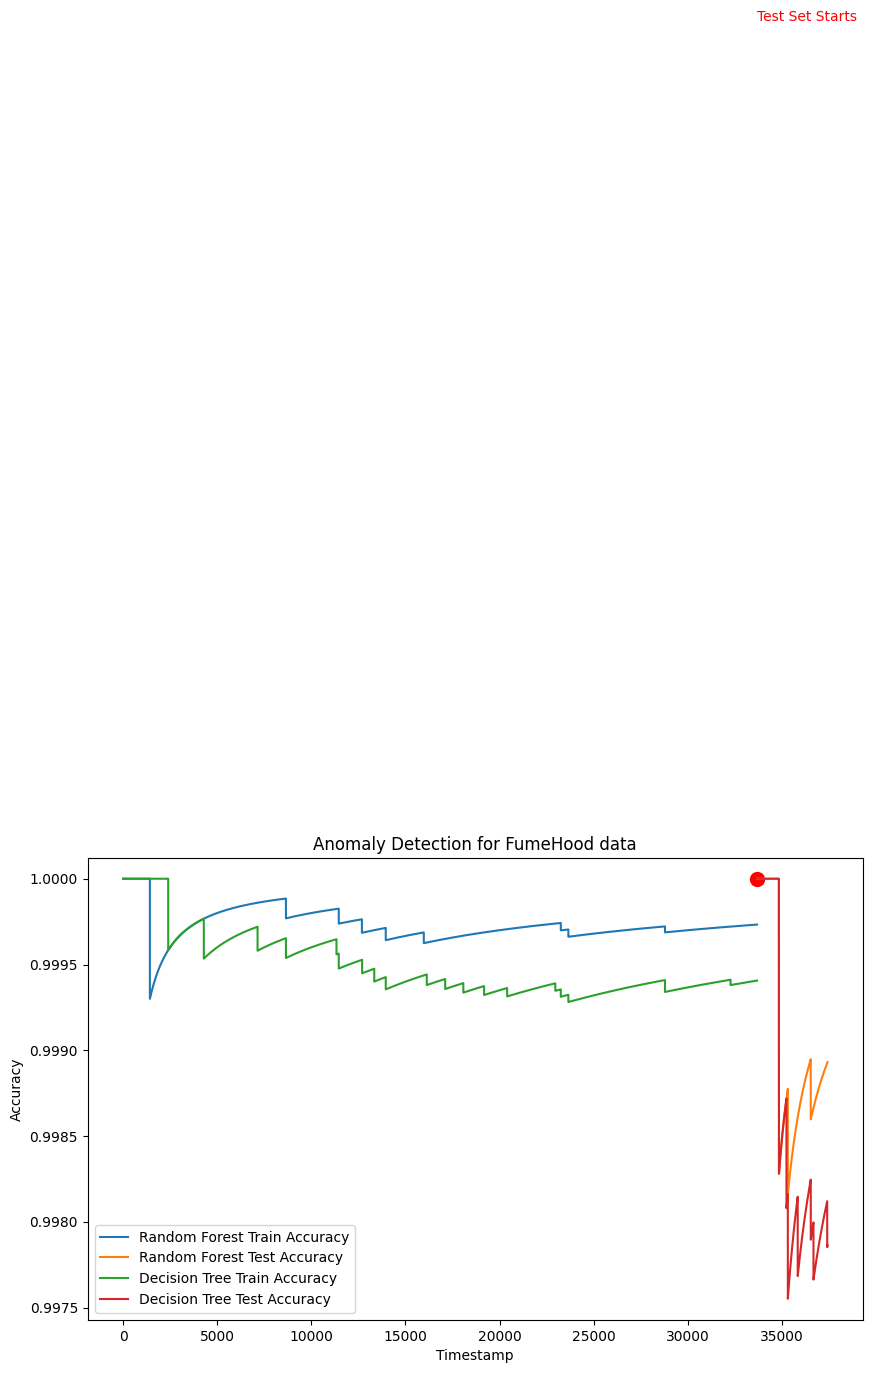

In [ ]:
def train_and_plot_anomaly_detection_models(data, datasetName):
    # Separate features (X) and labels (y)
    X = data.drop(columns=['label'])
    y = data['label']

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=24)

    # Initialize models
    models = [
        ("Random Forest", RandomForestClassifier(max_depth=10, min_samples_split=10, random_state=42)),
        ("Decision Tree", DecisionTreeClassifier(max_depth=10, min_samples_split=10, random_state=42))
    ]

    # Create subplots
    fig, ax = plt.subplots(figsize=(10, 6))

    for name, model in models:
        # Fit the model
        model.fit(X_train, y_train)

        # Calculate accuracy over time for training data
        acc_train = []
        acc_sum_train = 0
        y_pred_train = model.predict(X_train)
        for i in range(len(y_train)):
            if y_train.iloc[i] == y_pred_train[i]:
                acc_sum_train += 1
            accuracy = acc_sum_train / (i + 1)
            acc_train.append(accuracy)

        # Calculate accuracy over time for test data
        acc_test = []
        acc_sum_test = 0
        y_pred_test = model.predict(X_test)
        for i in range(len(y_test)):
            if y_test.iloc[i] == y_pred_test[i]:
                acc_sum_test += 1
            accuracy = acc_sum_test / (i + 1)
            acc_test.append(accuracy)

        # Plot accuracy over time for both training and test data
        ax.plot(range(len(acc_train)), acc_train, label=f'{name} Train Accuracy', linestyle='-')
        ax.plot(range(len(acc_train), len(acc_train) + len(acc_test)), acc_test, label=f'{name} Test Accuracy', linestyle='-')

    # Mark the point where test data starts
    ax.scatter(len(y_train), acc_test[0], s=100, c='r')
    ax.text(len(y_train), acc_test[0] + 0.005, 'Test Set Starts', c='r')

    ax.set_title(f"Anomaly Detection for {datasetName} data")
    ax.set_xlabel('Timestamp')
    ax.set_ylabel('Accuracy')
    ax.legend()

    plt.tight_layout()
    plt.show()

# Example usage:
# Assuming fumeHood_Data_with_labels is your DataFrame with 'label' column indicating anomalies
train_and_plot_anomaly_detection_models(fumeHood_Data_with_labels, "FumeHood")


## DT and RF Static Models for Pump Data

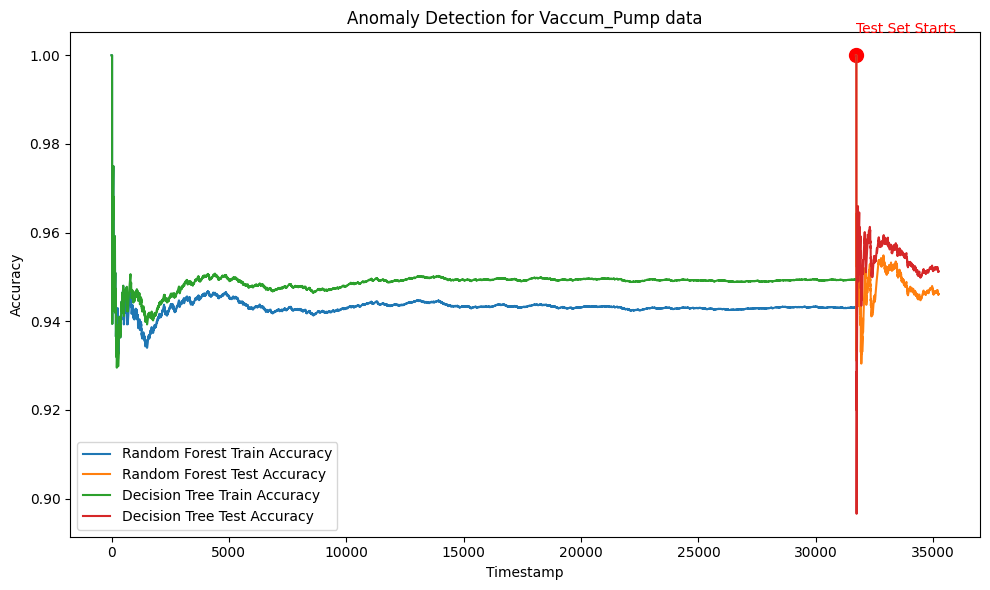

In [ ]:
def train_and_plot_anomaly_detection_models(data, datasetName):
    # Separate features (X) and labels (y)
    X = data.drop(columns=['label'])
    y = data['label']

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=24)

    # Initialize models
    models = [
        ("Random Forest", RandomForestClassifier(max_depth=10, min_samples_split=10, random_state=42)),
        ("Decision Tree", DecisionTreeClassifier(max_depth=10, min_samples_split=10, random_state=42))
    ]

    # Create subplots
    fig, ax = plt.subplots(figsize=(10, 6))

    for name, model in models:
        # Fit the model
        model.fit(X_train, y_train)

        # Calculate accuracy over time for training data
        acc_train = []
        acc_sum_train = 0
        y_pred_train = model.predict(X_train)
        for i in range(len(y_train)):
            if y_train.iloc[i] == y_pred_train[i]:
                acc_sum_train += 1
            accuracy = acc_sum_train / (i + 1)
            acc_train.append(accuracy)

        # Calculate accuracy over time for test data
        acc_test = []
        acc_sum_test = 0
        y_pred_test = model.predict(X_test)
        for i in range(len(y_test)):
            if y_test.iloc[i] == y_pred_test[i]:
                acc_sum_test += 1
            accuracy = acc_sum_test / (i + 1)
            acc_test.append(accuracy)

        # Plot accuracy over time for both training and test data
        ax.plot(range(len(acc_train)), acc_train, label=f'{name} Train Accuracy', linestyle='-')
        ax.plot(range(len(acc_train), len(acc_train) + len(acc_test)), acc_test, label=f'{name} Test Accuracy', linestyle='-')

    # Mark the point where test data starts
    ax.scatter(len(y_train), acc_test[0], s=100, c='r')
    ax.text(len(y_train), acc_test[0] + 0.005, 'Test Set Starts', c='r')

    ax.set_title(f"Anomaly Detection for {datasetName} data")
    ax.set_xlabel('Timestamp')
    ax.set_ylabel('Accuracy')
    ax.legend()

    plt.tight_layout()
    plt.show()

# Example usage:
# Assuming fumeHood_Data_with_labels is your DataFrame with 'label' column indicating anomalies
train_and_plot_anomaly_detection_models(Pump_Data_with_labels, "Vaccum_Pump")


## Static Models for Karl Suss

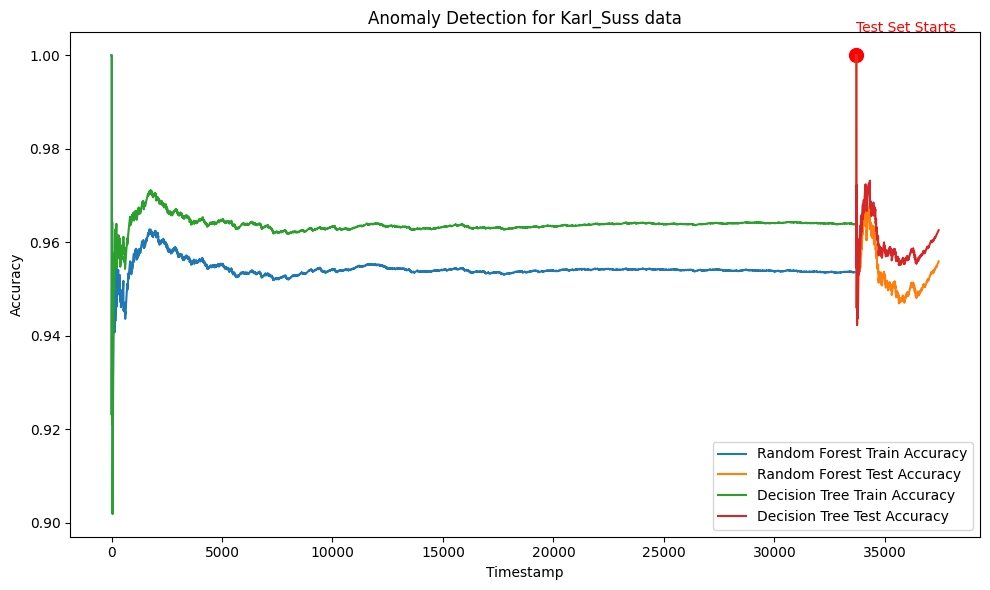

In [ ]:
def train_and_plot_anomaly_detection_models(data, datasetName):
    # Separate features (X) and labels (y)
    X = data.drop(columns=['label'])
    y = data['label']

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=24)

    # Initialize models
    models = [
        ("Random Forest", RandomForestClassifier(max_depth=10, min_samples_split=10, random_state=42)),
        ("Decision Tree", DecisionTreeClassifier(max_depth=10, min_samples_split=10, random_state=42))
    ]

    # Create subplots
    fig, ax = plt.subplots(figsize=(10, 6))

    for name, model in models:
        # Fit the model
        model.fit(X_train, y_train)

        # Calculate accuracy over time for training data
        acc_train = []
        acc_sum_train = 0
        y_pred_train = model.predict(X_train)
        for i in range(len(y_train)):
            if y_train.iloc[i] == y_pred_train[i]:
                acc_sum_train += 1
            accuracy = acc_sum_train / (i + 1)
            acc_train.append(accuracy)

        # Calculate accuracy over time for test data
        acc_test = []
        acc_sum_test = 0
        y_pred_test = model.predict(X_test)
        for i in range(len(y_test)):
            if y_test.iloc[i] == y_pred_test[i]:
                acc_sum_test += 1
            accuracy = acc_sum_test / (i + 1)
            acc_test.append(accuracy)

        # Plot accuracy over time for both training and test data
        ax.plot(range(len(acc_train)), acc_train, label=f'{name} Train Accuracy', linestyle='-')
        ax.plot(range(len(acc_train), len(acc_train) + len(acc_test)), acc_test, label=f'{name} Test Accuracy', linestyle='-')

    # Mark the point where test data starts
    ax.scatter(len(y_train), acc_test[0], s=100, c='r')
    ax.text(len(y_train), acc_test[0] + 0.005, 'Test Set Starts', c='r')

    ax.set_title(f"Anomaly Detection for {datasetName} data")
    ax.set_xlabel('Timestamp')
    ax.set_ylabel('Accuracy')
    ax.legend()

    plt.tight_layout()
    plt.show()

# Example usage:
# Assuming fumeHood_Data_with_labels is your DataFrame with 'label' column indicating anomalies
train_and_plot_anomaly_detection_models(karlsuss_Data_with_labels, "Karl_Suss")


## MIn Reading the dataset and inserting anomalies

In [ ]:
pump18A_Data = pd.read_csv('/content/drive/MyDrive/DigitalTwin/Pump18A-196362-6.csv')
fumeHood_Data = pd.read_csv('/content/drive/MyDrive/DigitalTwin/FumeHood.csv')
nearKarlSussMid_Data = pd.read_csv('/content/drive/MyDrive/DigitalTwin/NearKarlSussMid.csv')

In [ ]:
# # def remove_null_values(df):
# #     # Count the number of null values in the DataFrame
# #     num_null_values = df.isnull().sum().sum()

# #     # Remove rows with null values
# #     cleaned_df = df.dropna()

# #     # Output the number of null values removed
# #     print("Number of null values removed:", num_null_values)

# #     return cleaned_df

# def inject_anomalies(data):
#     # Copy the original DataFrame to avoid modifying the original data
#     data_with_anomalies = data.copy()

#     # Calculate standard deviations for each column (excluding 'timestamp')
#     sd_dict = data.drop(columns=['timestamp']).std().to_dict()

#     # Create an empty list to store anomalous records
#     anomalous_records = []

#     # Number of existing records
#     num_records = len(data_with_anomalies)

#     # Target number of anomalous records (10% of normal data)
#     target_anomaly_count = int(0.1 * num_records)

#     # Iterate through the entire dataset
#     while len(anomalous_records) < target_anomaly_count:
#         # Randomly select one of the four anomaly types
#         anomaly_type = np.random.choice(['Positive Shift', 'Negative Shift', 'Chunked Anomalies', 'Anomalies with Large Scale'])

#         # Randomly select an index in the data
#         idx = np.random.randint(0, num_records)

#         # try:
#         #     # Shift timestamp forward by 5 from the previous record
#         #     anomaly_timestamp = data_with_anomalies.loc[idx, 'timestamp'] + 5
#         # except KeyError:
#         #     print("KeyError occurred at index:", idx)
#         #     print("Number of records:", num_records)
#         #     raise

#         # Create a dictionary to store anomaly values
#         #anomaly_row = {'timestamp': anomaly_timestamp}

#         anomaly_raw={}

#         if anomaly_type == 'Positive Shift':
#             anomaly_row['class_label'] = 'Anomaly_1'
#             # Shift values of all columns by the standard deviations and add Gaussian noise
#             for col in data_with_anomalies.columns:
#                 if col != 'timestamp':
#                     anomaly_row[col] = data_with_anomalies.loc[idx, col] + sd_dict.get(col, 0) + np.random.normal(2, 5)

#         elif anomaly_type == 'Negative Shift':
#             anomaly_row['class_label'] = 'Anomaly_2'
#             # Shift values of all columns by the standard deviations and add Gaussian noise
#             for col in data_with_anomalies.columns:
#                 if col != 'timestamp':
#                     anomaly_row[col] = data_with_anomalies.loc[idx, col] - sd_dict.get(col, 0) + np.random.normal(2, 5)

#         elif anomaly_type == 'Chunked Anomalies':
#             anomaly_row['class_label'] = 'Anomaly_3'
#             chunk_size = 5
#             # Generate chunked anomalies
#             for k in range(chunk_size):
#                 chunk_anomaly_row = anomaly_row.copy()  # Create a copy to avoid overwriting values
#                 # Shift values of all columns by the standard deviations and add Gaussian noise
#                 for col in data_with_anomalies.columns:
#                     if col != 'timestamp':
#                         chunk_anomaly_row[col] = data_with_anomalies.loc[idx, col] + np.random.normal(2, 5)  # Add Gaussian noise
#                 anomalous_records.append(chunk_anomaly_row)
#                 anomaly_row['timestamp'] += 1

#         elif anomaly_type == 'Anomalies with Large Scale':
#             anomaly_row['class_label'] = 'Anomaly_4'
#             # Set all column values to the mean + standard deviation
#             for col in data_with_anomalies.columns:
#                 if col != 'timestamp':
#                     anomaly_row[col] = data_with_anomalies[col].mean() + sd_dict.get(col, 0)



#         # Append anomalous record to the list
#         anomalous_records.append(anomaly_row)

#     # Convert the list of dictionaries to a DataFrame
#     anomalous_records_df = pd.DataFrame(anomalous_records)

#     # Sort the DataFrame based on timestamp
#     anomalous_records_df = anomalous_records_df.sort_values(by='timestamp').reset_index(drop=True)

#     # Join anomalous records DataFrame with the original DataFrame
#     data_with_anomalies = pd.concat([data_with_anomalies, anomalous_records_df]).sort_values(by='timestamp').reset_index(drop=True)

#     # Replace NaN values in the 'class_label' column with 'Normal'
#     data_with_anomalies['class_label'].fillna('Normal', inplace=True)

#     return data_with_anomalies




In [ ]:
print(fumeHood_Data_w_anomalies.columns)

print(pump18A_Data_w_anomalies.columns)
print(nearKarlSussMid_Data_w_anomalies.columns)

Index(['timestamp', 'airflow', 'temperature', 'humidity', 'class_label'], dtype='object')
Index(['timestamp', 'temperature', 'class_label'], dtype='object')
Index(['timestamp', 'humidity', 'temperature', 'class_label'], dtype='object')


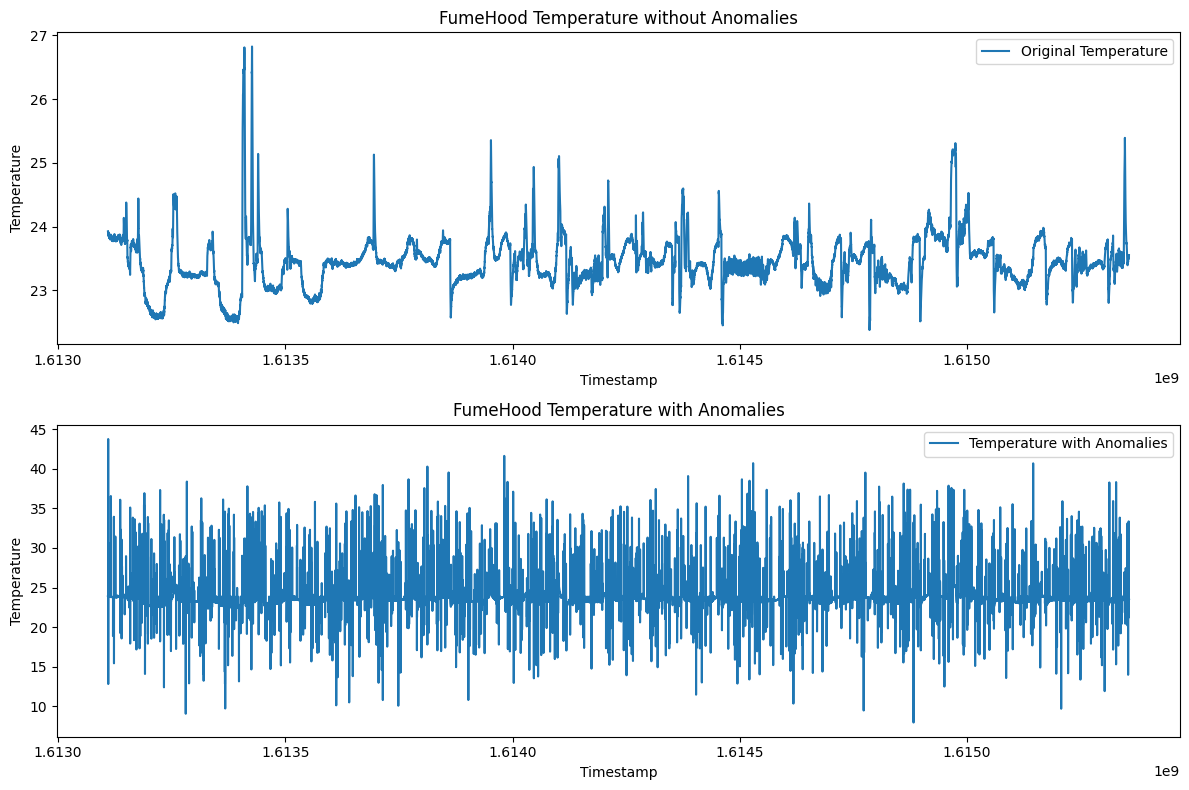

In [ ]:
# # Create two subplots
# fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))

# # Plot the original data without anomalies in the first subplot
# ax1.plot(fumeHood_Data['timestamp'], fumeHood_Data['temperature'], label='Original Temperature')
# ax1.set_title('FumeHood Temperature without Anomalies')
# ax1.set_xlabel('Timestamp')
# ax1.set_ylabel('Temperature')
# ax1.legend()

# # Plot the data with anomalies in the second subplot
# ax2.plot(fumeHood_Data_w_anomalies['timestamp'], fumeHood_Data_w_anomalies['temperature'], label='Temperature with Anomalies')
# ax2.set_title('FumeHood Temperature with Anomalies')
# ax2.set_xlabel('Timestamp')
# ax2.set_ylabel('Temperature')
# ax2.legend()

# # Adjust the spacing between subplots
# plt.tight_layout()

# # Display the plot
# plt.show()

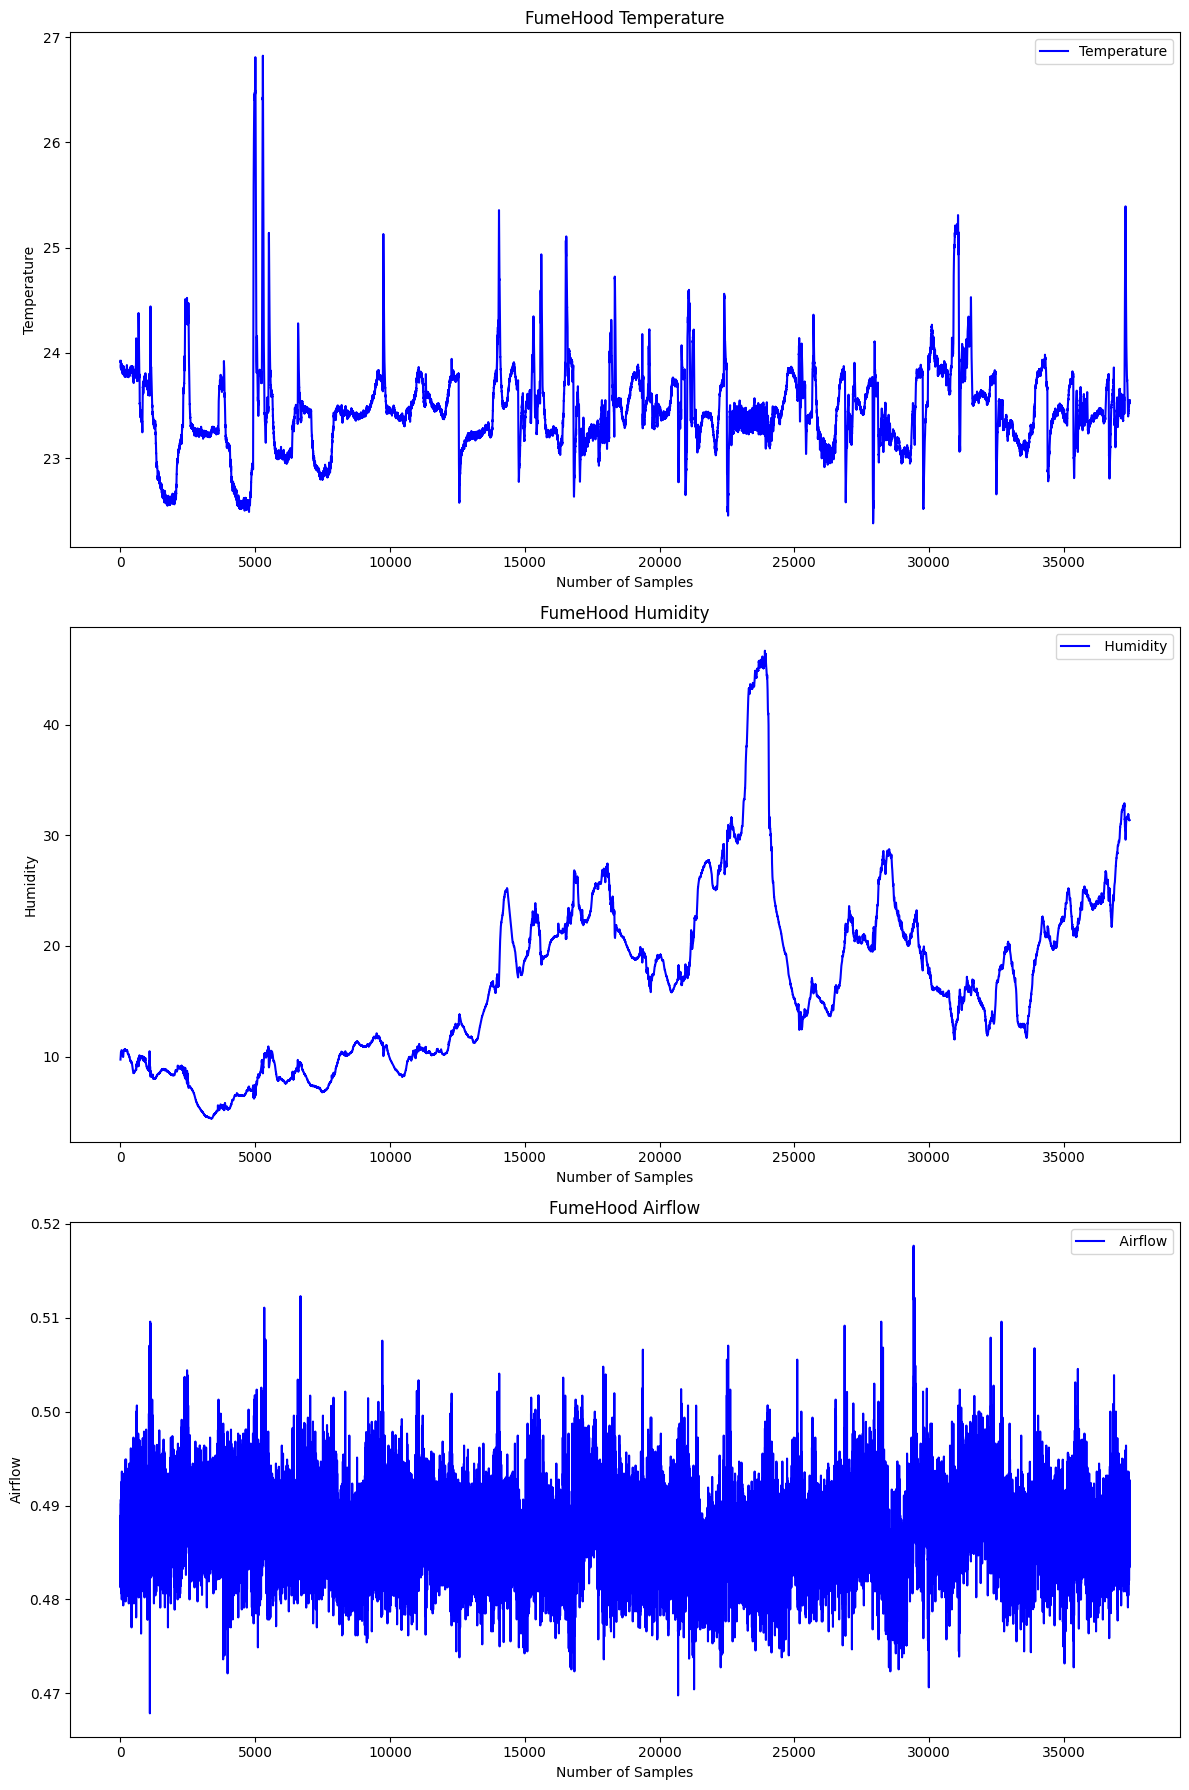

In [ ]:
# Create three subplots
fig, axes = plt.subplots(3, 1, figsize=(12, 18))

# Plot temperature
axes[0].plot(fumeHood_Data.index, fumeHood_Data['temperature'], label='Temperature', color='blue')
#axes[0].plot(fumeHood_Data_w_anomalies['timestamp'], fumeHood_Data_w_anomalies['temperature'], label='Temperature with Anomalies', color='red')
axes[0].set_title('FumeHood Temperature')
axes[0].set_xlabel('Number of Samples')
axes[0].set_ylabel('Temperature')
axes[0].legend()

# Plot humidity
axes[1].plot(fumeHood_Data.index, fumeHood_Data['humidity'], label=' Humidity', color='blue')
#axes[1].plot(fumeHood_Data_w_anomalies['timestamp'], fumeHood_Data_w_anomalies['humidity'], label='Humidity with Anomalies', color='red')
axes[1].set_title('FumeHood Humidity')
axes[1].set_xlabel('Number of Samples')
axes[1].set_ylabel('Humidity')
axes[1].legend()

# Plot airflow
axes[2].plot(fumeHood_Data.index, fumeHood_Data['airflow'], label=' Airflow', color='blue')
#axes[2].plot(fumeHood_Data_w_anomalies['timestamp'], fumeHood_Data_w_anomalies['airflow'], label='Airflow with Anomalies', color='red')
axes[2].set_title('FumeHood Airflow')
axes[2].set_xlabel('Number of Samples')
axes[2].set_ylabel('Airflow')
axes[2].legend()

# Adjust the spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()

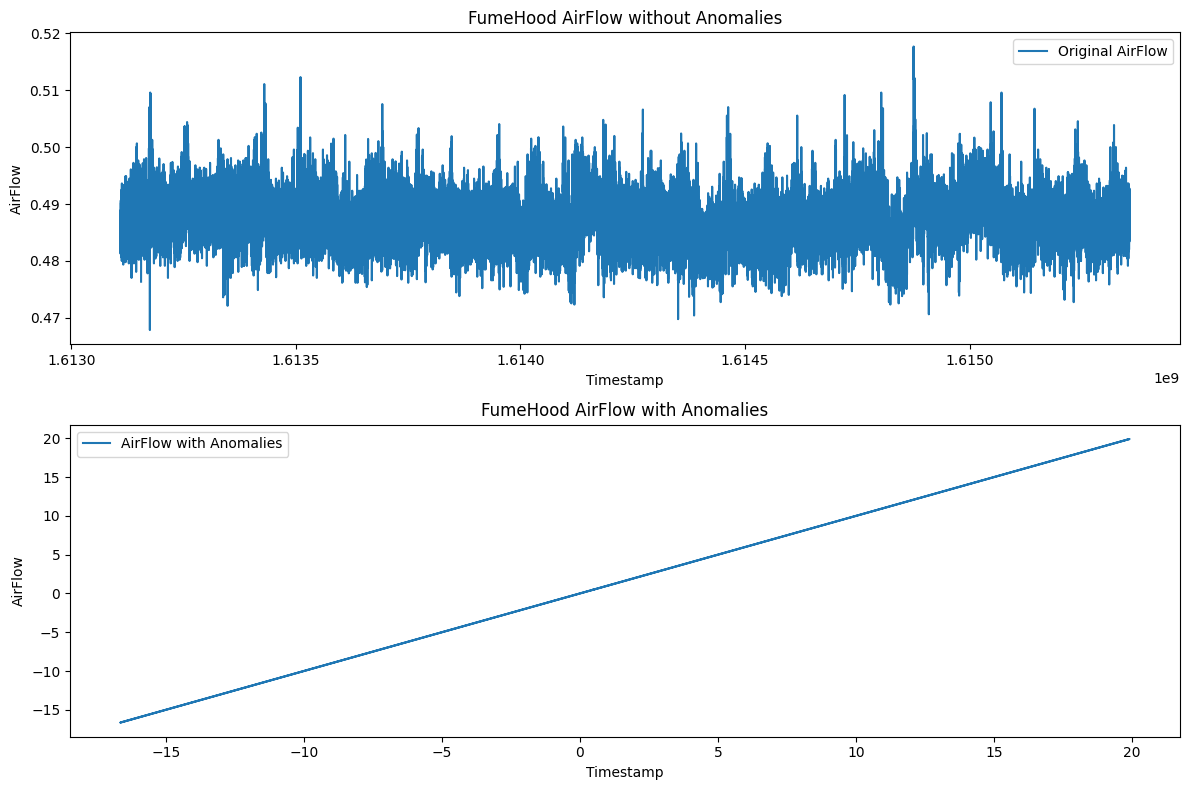

In [ ]:
# # Create two subplots
# fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))

# # Plot the original data without anomalies in the first subplot
# ax1.plot(fumeHood_Data['timestamp'], fumeHood_Data['airflow'], label='Original AirFlow')
# ax1.set_title('FumeHood AirFlow without Anomalies')
# ax1.set_xlabel('Timestamp')
# ax1.set_ylabel('AirFlow')
# ax1.legend()

# # Plot the data with anomalies in the second subplot
# ax2.plot(fumeHood_Data_w_anomalies['airflow'], fumeHood_Data_w_anomalies['airflow'], label='AirFlow with Anomalies')
# ax2.set_title('FumeHood AirFlow with Anomalies')
# ax2.set_xlabel('Timestamp')
# ax2.set_ylabel('AirFlow')
# ax2.legend()

# # Adjust the spacing between subplots
# plt.tight_layout()

# # Display the plot
# plt.show()

In [ ]:
# # Create two subplots
# fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))

# # Plot the original data without anomalies in the first subplot
# ax1.plot(fumeHood_Data['timestamp'], fumeHood_Data['airflow'], label='Original AirFlow')
# ax1.set_title('FumeHood AirFlow without Anomalies')
# ax1.set_xlabel('Timestamp')
# ax1.set_ylabel('AirFlow')
# ax1.legend()

# # Plot the data with anomalies in the second subplot
# ax2.plot(fumeHood_Data_w_anomalies['airflow'], fumeHood_Data_w_anomalies['airflow'], label='AirFlow with Anomalies')
# ax2.set_title('FumeHood AirFlow with Anomalies')
# ax2.set_xlabel('Timestamp')
# ax2.set_ylabel('AirFlow')
# ax2.legend()

# # Adjust the spacing between subplots
# plt.tight_layout()

# # Display the plot
# plt.show()

In [ ]:
def train_and_plot_anomaly_detection_models(data, datasetName):
    # Separate features (X) and labels (y)
    X = data.drop(columns=['class_label'])
    y = data['class_label']

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=24)

    # Initialize models
    models = [
        ("Random Forest", RandomForestClassifier(max_depth=10, min_samples_split=10, random_state=42)),
        ("Decision Tree", DecisionTreeClassifier(max_depth=10, min_samples_split=10, random_state=42))
    ]

    # Create subplots for each model
    fig, axes = plt.subplots(len(models), 1, figsize=(10, 6*len(models)))

    for idx, (name, model) in enumerate(models):
        # Fit the model
        model.fit(X_train, y_train)

        # Calculate accuracy over time for training data
        acc_train = []
        acc_sum_train = 0
        y_pred_train = model.predict(X_train)
        for i in range(len(y_train)):
            if y_train.iloc[i] == y_pred_train[i]:
                acc_sum_train += 1
            accuracy = acc_sum_train / (i + 1)
            acc_train.append(accuracy)

        # Calculate accuracy over time for test data
        acc_test = []
        acc_sum_test = 0
        y_pred_test = model.predict(X_test)
        for i in range(len(y_test)):
            if y_test.iloc[i] == y_pred_test[i]:
                acc_sum_test += 1
            accuracy = acc_sum_test / (i + 1)
            acc_test.append(accuracy)

        # Plot accuracy over time for both training and test data
        axes[idx].plot(range(len(acc_train)), acc_train, label='Train Accuracy', linestyle='-')
        axes[idx].plot(range(len(acc_train), len(acc_train) + len(acc_test)), acc_test, label='Test Accuracy', linestyle='-')

        # Mark the point where test data starts
        axes[idx].scatter(len(y_train), acc_test[0], s=100, c='r')
        axes[idx].text(len(y_train), acc_test[0] + 0.005, 'Test Set Starts', c='r')

        axes[idx].set_title(f"{name} Anomaly Detection for {datasetName} dataset")
        axes[idx].set_xlabel('Timestamp')
        axes[idx].set_ylabel('Accuracy')
        axes[idx].legend()

    plt.tight_layout()
    plt.show()


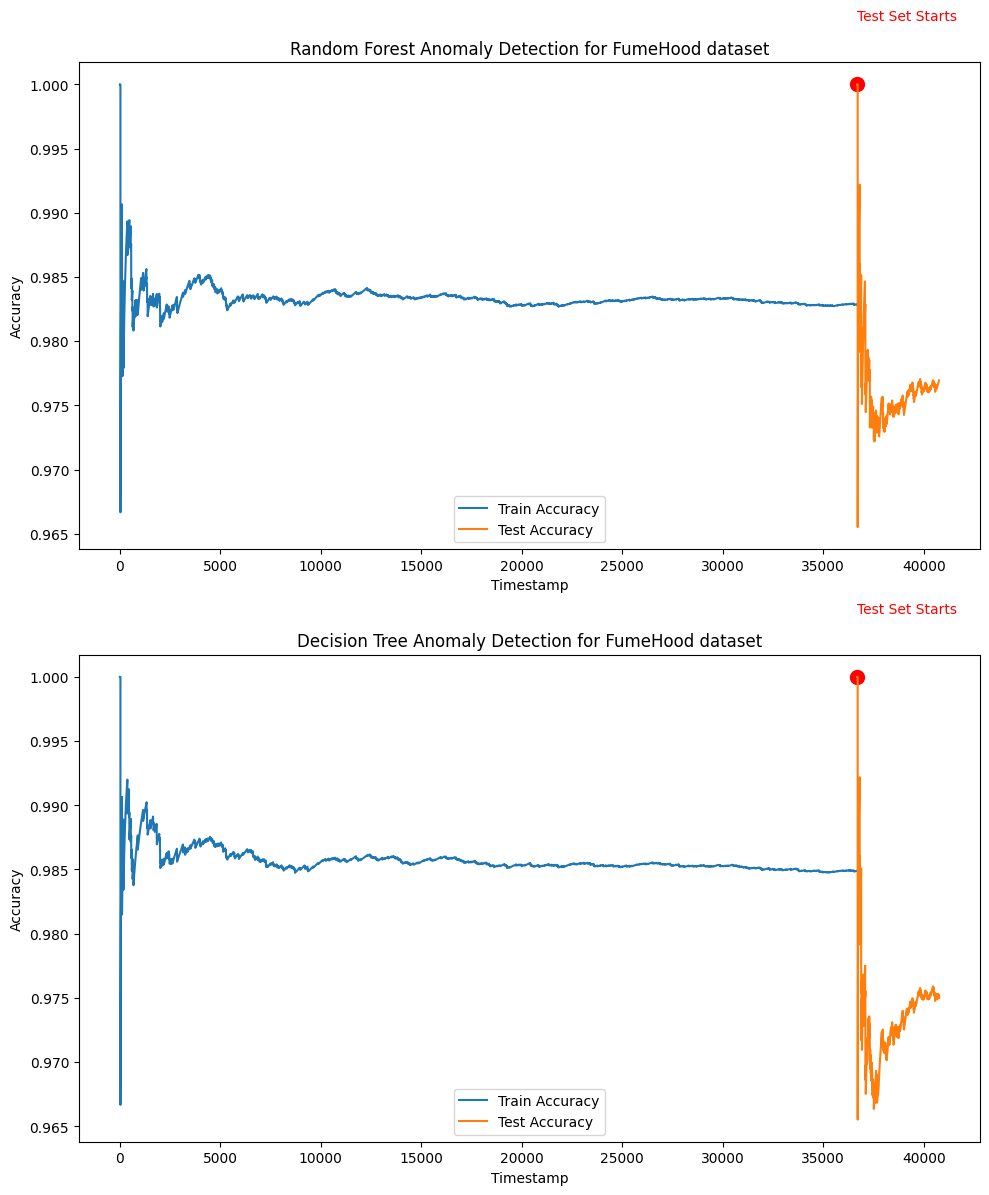

In [ ]:
train_and_plot_anomaly_detection_models(fumeHood_Data_w_anomalies, "FumeHood")

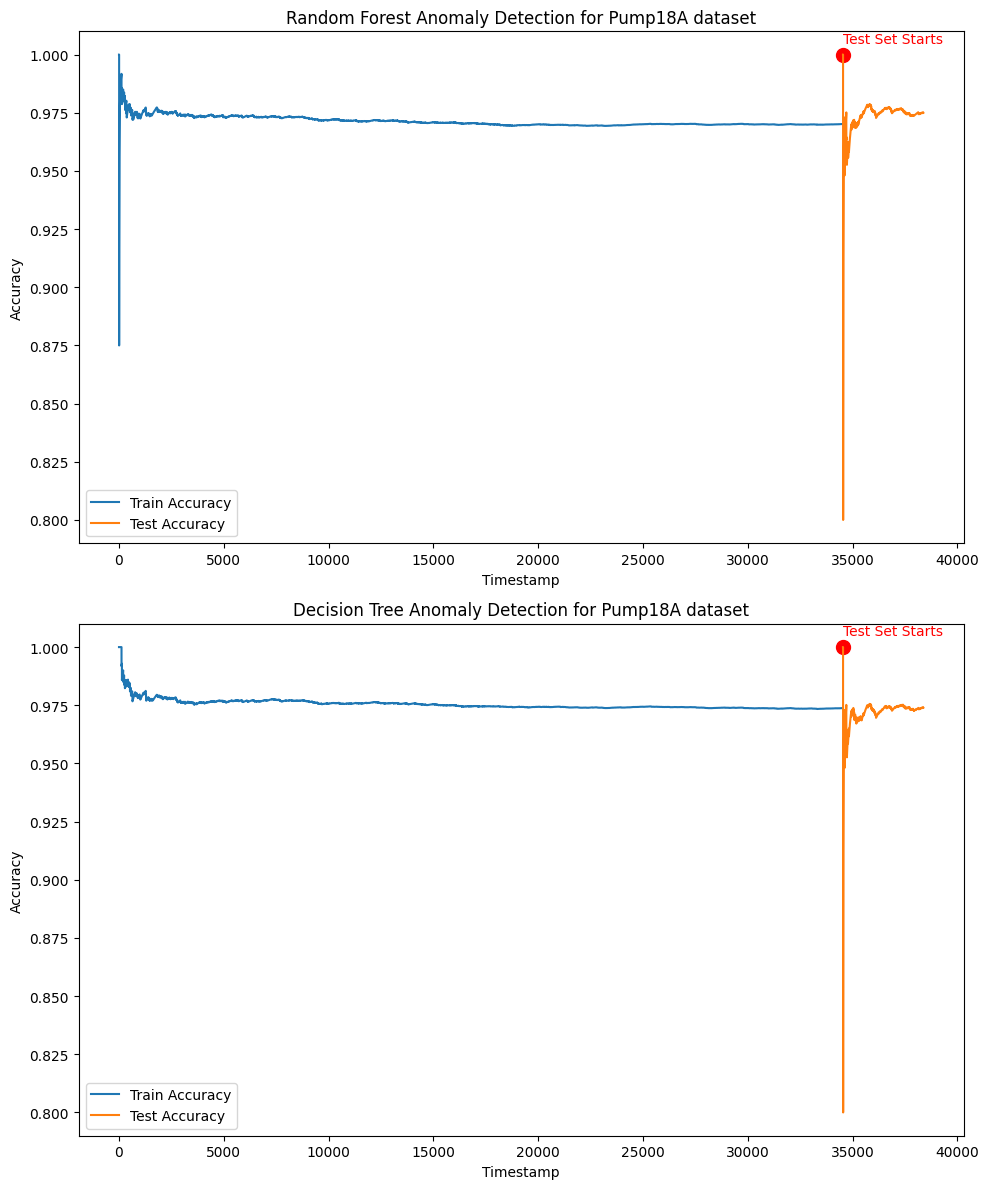

In [ ]:
train_and_plot_anomaly_detection_models(pump18A_Data_w_anomalies, "Pump18A")

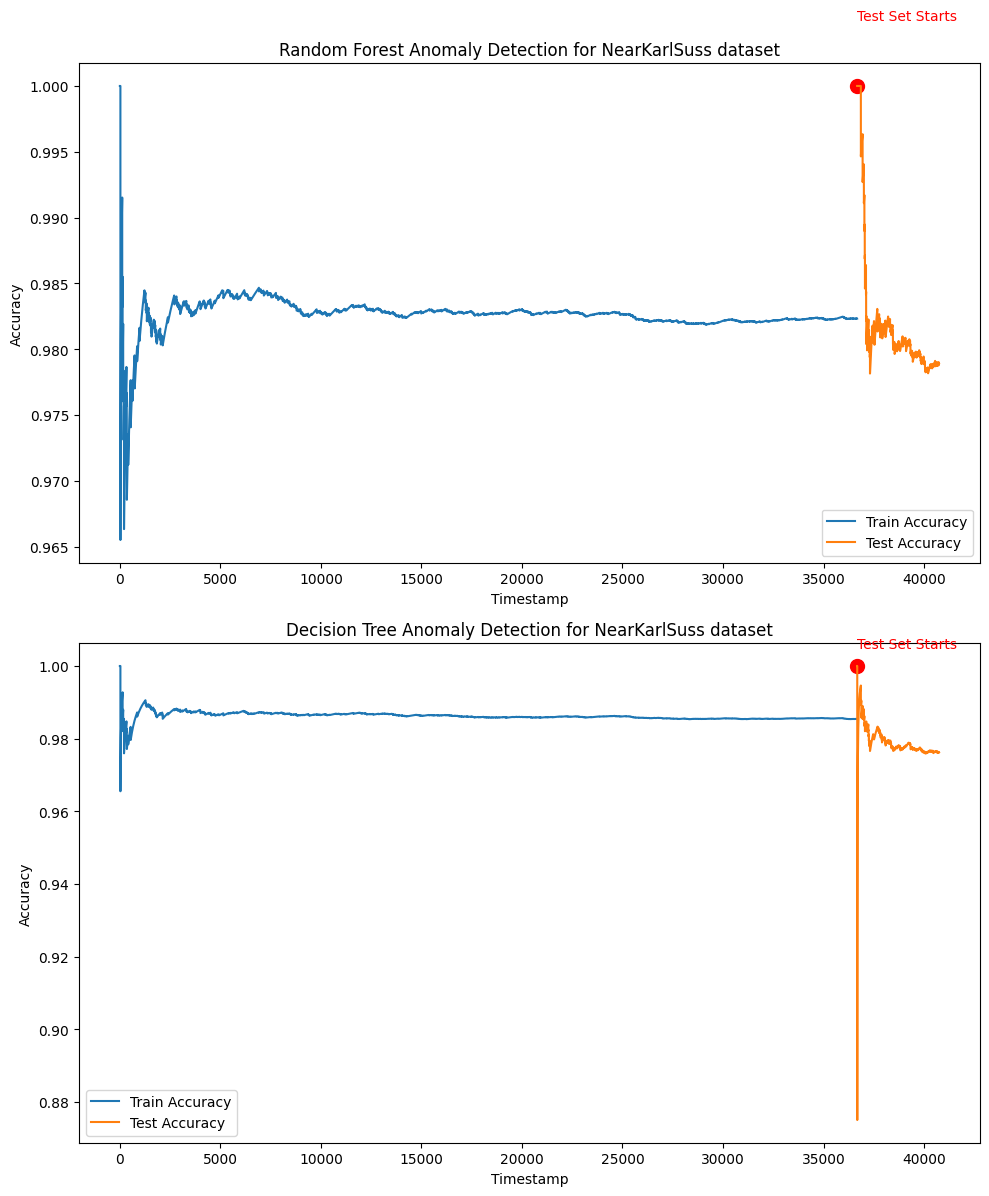

In [ ]:
train_and_plot_anomaly_detection_models(nearKarlSussMid_Data_w_anomalies, "NearKarlSuss")

In [ ]:
def adaptive_learning(model, X_train, y_train, X_test, y_test):
    metric = metrics.Accuracy() # Use accuracy as the metric
    i = 0 # count the number of evaluated data points
    t = [] # record the number of evaluated data points
    m = [] # record the real-time accuracy
    yt = [] # record all the true labels of the test set
    yp = [] # record all the predicted labels of the test set

    # Learn the training set
    for xi1, yi1 in stream.iter_pandas(X_train, y_train):
        model.learn_one(xi1,yi1)

    # Predict the test set
    for xi, yi in stream.iter_pandas(X_test, y_test):
        y_pred= model.predict_one(xi)  # Predict the test sample
        model.learn_one(xi,yi) # Learn the test sample
        metric = metric.update(yi, y_pred) # Update the real-time accuracy
        t.append(i)
        m.append(metric.get()*100)
        yt.append(yi)
        yp.append(y_pred)
        i = i+1
    print("Accuracy: "+str(round(accuracy_score(yt,yp),4)*100)+"%")
    print("Precision: "+str(round(precision_score(yt,yp, average="weighted"),4)*100)+"%")
    print("Recall: "+str(round(recall_score(yt,yp, average="weighted"),4)*100)+"%")
    print("F1-score: "+str(round(f1_score(yt,yp, average="weighted"),4)*100)+"%")
    return t, m

In [ ]:
def PWPAE(X_train, y_train, X_test, y_test):
    # Record the real-time accuracy of PWPAE and 4 base learners
    metric = metrics.Accuracy()
    metric1 = metrics.Accuracy()
    metric2 = metrics.Accuracy()
    metric3 = metrics.Accuracy()
    metric4 = metrics.Accuracy()

    t = []
    m = []
    yt = []
    yp = []

    hat1 = ensemble.AdaptiveRandomForestClassifier(n_models=3) # ARF-ADWIN
    hat2 = ensemble.SRPClassifier(n_models=3) # SRP-ADWIN
    hat3 = ensemble.AdaptiveRandomForestClassifier(n_models=3, drift_detector=DDM(), warning_detector=DDM()) # ARF-DDM
    hat4 = ensemble.SRPClassifier(n_models=3, drift_detector=DDM(), warning_detector=DDM()) # SRP-DDM

    # The four base learners learn the training set
    for xi1, yi1 in stream.iter_pandas(X_train, y_train):
        hat1.learn_one(xi1, yi1)
        hat2.learn_one(xi1, yi1)
        hat3.learn_one(xi1, yi1)
        hat4.learn_one(xi1, yi1)

    i = 0  # Initialize i
    # Predict the test set
    for xi, yi in stream.iter_pandas(X_test, y_test):
        # The four base learner predict the labels
        y_pred1 = hat1.predict_one(xi)
        y_pred2 = hat2.predict_one(xi)
        y_pred3 = hat3.predict_one(xi)
        y_pred4 = hat4.predict_one(xi)

        # Update metrics
        metric1 = metric1.update(yi, y_pred1)
        metric2 = metric2.update(yi, y_pred2)
        metric3 = metric3.update(yi, y_pred3)
        metric4 = metric4.update(yi, y_pred4)

        # Calculate the real-time error rates of four base learners
        e1 = 1 - metric1.get()
        e2 = 1 - metric2.get()
        e3 = 1 - metric3.get()
        e4 = 1 - metric4.get()

        ep = 0.001  # The epsilon used to avoid dividing by 0
        # Calculate the weight of each base learner by the reciprocal of its real-time error rate
        ea = 1 / (e1 + ep) + 1 / (e2 + ep) + 1 / (e3 + ep) + 1 / (e4 + ep)
        w1 = 1 / (e1 + ep) / ea
        w2 = 1 / (e2 + ep) / ea
        w3 = 1 / (e3 + ep) / ea
        w4 = 1 / (e4 + ep) / ea

        # Make ensemble predictions by averaging probabilities
        prob1 = hat1.predict_proba_one(xi)
        prob2 = hat2.predict_proba_one(xi)
        prob3 = hat3.predict_proba_one(xi)
        prob4 = hat4.predict_proba_one(xi)

        # Check if probabilities are available
        if prob1 is None or len(prob1) != 2:
            prob1 = [0.5, 0.5]
        if prob2 is None or len(prob2) != 2:
            prob2 = [0.5, 0.5]
        if prob3 is None or len(prob3) != 2:
            prob3 = [0.5, 0.5]
        if prob4 is None or len(prob4) != 2:
            prob4 = [0.5, 0.5]

        y_prob_0 = (w1 * prob1[0] + w2 * prob2[0] + w3 * prob3[0] + w4 * prob4[0])

        y_pred = 0 if y_prob_0 >= 0.5 else 1

        # Update the real-time accuracy of the ensemble model
        metric = metric.update(yi, y_pred)

        t.append(i)
        m.append(metric.get() * 100)
        yt.append(yi)
        yp.append(y_pred)

        i += 1  # Increment i

    return t, m


In [ ]:
def train_and_plot_models(data, datasetName):
    # Separate features (X) and labels (y)
    X = data.drop(columns=['class_label'])
    y = data['class_label']

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=24)

    # Define models
    models = [
        ("ARF-ADWIN model", ensemble.AdaptiveRandomForestClassifier(n_models=3, drift_detector=ADWIN())),
        ("ARF-DDM model", ensemble.AdaptiveRandomForestClassifier(n_models=3, drift_detector=DDM(), warning_detector=DDM())),
        ("SRP-ADWIN model", ensemble.SRPClassifier(n_models=3, drift_detector=ADWIN())),
        ("SRP-DDM model", ensemble.SRPClassifier(n_models=3, drift_detector=DDM(), warning_detector=DDM())),
        ("EFDT model", tree.ExtremelyFastDecisionTreeClassifier()),
        ("HT model", tree.HoeffdingTreeClassifier()),
        ("LB model", ensemble.LeveragingBaggingClassifier(model=tree.HoeffdingTreeClassifier(), n_models=3))
    ]

    # Initialize lists to store accuracy for each model
    accuracy_over_time = {name: [] for name, _ in models}

    # Train and evaluate each model
    for name, model in models:
        print(name)
        _, accuracy = adaptive_learning(model, X_train, y_train, X_test, y_test)
        accuracy_over_time[name] = accuracy
        print()

    # # PWPAE model
    # print("PWPAE Model")
    # t, m = PWPAE(X_train, y_train, X_test, y_test)
    # accuracy_over_time["Proposed PWPAE model"] = m
    # print()

    # Plot accuracy over time for each model
    plt.figure(figsize=(20, 10))
    sns.set_style("darkgrid")

    for name, accuracy in accuracy_over_time.items():
        plt.plot(range(len(accuracy)), accuracy, label=f"{name}, Avg Accuracy: {np.mean(accuracy):.2f}%")

    plt.legend(loc='lower right')
    plt.ylim(90, 102)
    plt.title(datasetName, fontsize=40)
    plt.xlabel('Number of samples')
    plt.ylabel('Accuracy (%)')
    plt.show()

In [ ]:
train_and_plot_models(pump18A_Data_w_anomalies, "Pump18A")

ARF-ADWIN model
Accuracy: 96.66%
Precision: 96.06%
Recall: 96.66%
F1-score: 96.35000000000001%

ARF-DDM model
Accuracy: 97.08%
Precision: 96.57%
Recall: 97.08%
F1-score: 96.8%

SRP-ADWIN model


IndexError: list index out of range

ARF-ADWIN model
Accuracy: 97.45%
Precision: 96.75%
Recall: 97.45%
F1-score: 96.95%

ARF-DDM model
Accuracy: 97.78999999999999%
Precision: 97.58%
Recall: 97.78999999999999%
F1-score: 97.46000000000001%

SRP-ADWIN model
Accuracy: 97.37%
Precision: 95.99%
Recall: 97.37%
F1-score: 96.64%

SRP-DDM model


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy: 97.57000000000001%
Precision: 97.04%
Recall: 97.57000000000001%
F1-score: 97.05%

EFDT model
Accuracy: 95.85000000000001%
Precision: 93.26%
Recall: 95.85000000000001%
F1-score: 94.53%

HT model


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy: 96.15%
Precision: 93.49%
Recall: 96.15%
F1-score: 94.78999999999999%

LB model


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy: 96.2%
Precision: 94.78%
Recall: 96.2%
F1-score: 95.37%



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


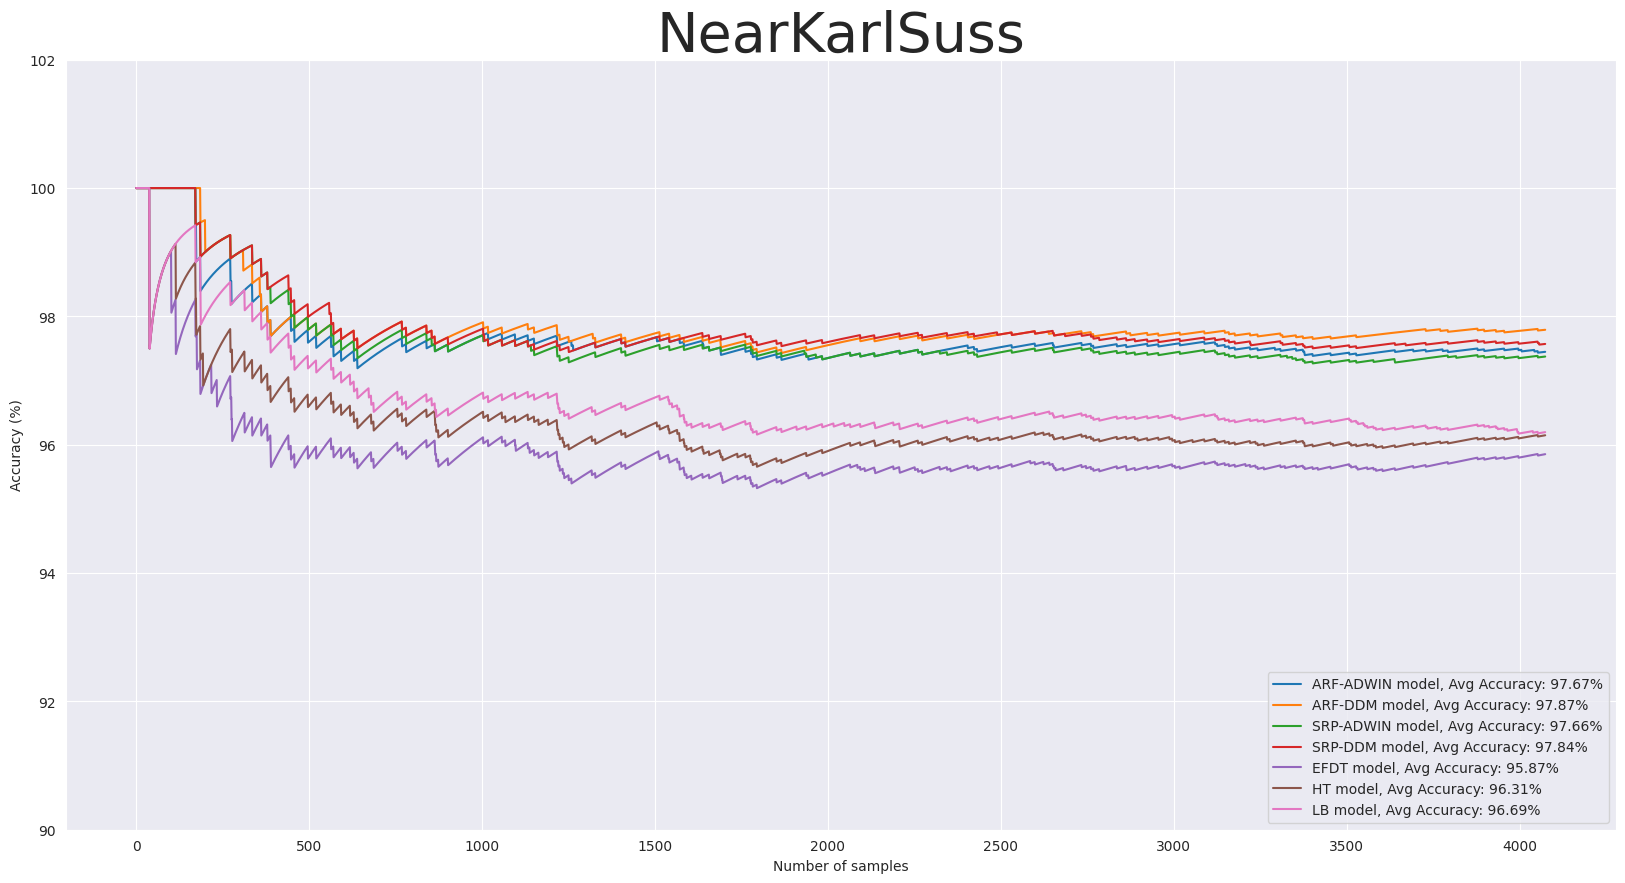

In [ ]:
train_and_plot_models(nearKarlSussMid_Data_w_anomalies, "NearKarlSuss")

ARF-ADWIN model
Accuracy: 97.67%
Precision: 97.26%
Recall: 97.67%
F1-score: 96.96000000000001%

ARF-DDM model
Accuracy: 97.72%
Precision: 97.39%
Recall: 97.72%
F1-score: 97.25%

SRP-ADWIN model
Accuracy: 97.28%
Precision: 95.95%
Recall: 97.28%
F1-score: 96.45%

SRP-DDM model


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy: 97.52%
Precision: 96.33%
Recall: 97.52%
F1-score: 96.75%

EFDT model
Accuracy: 96.81%
Precision: 95.78%
Recall: 96.81%
F1-score: 96.07%

HT model


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy: 96.17%
Precision: 93.89%
Recall: 96.17%
F1-score: 94.91000000000001%

LB model


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy: 97.65%
Precision: 96.50999999999999%
Recall: 97.65%
F1-score: 96.87%



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


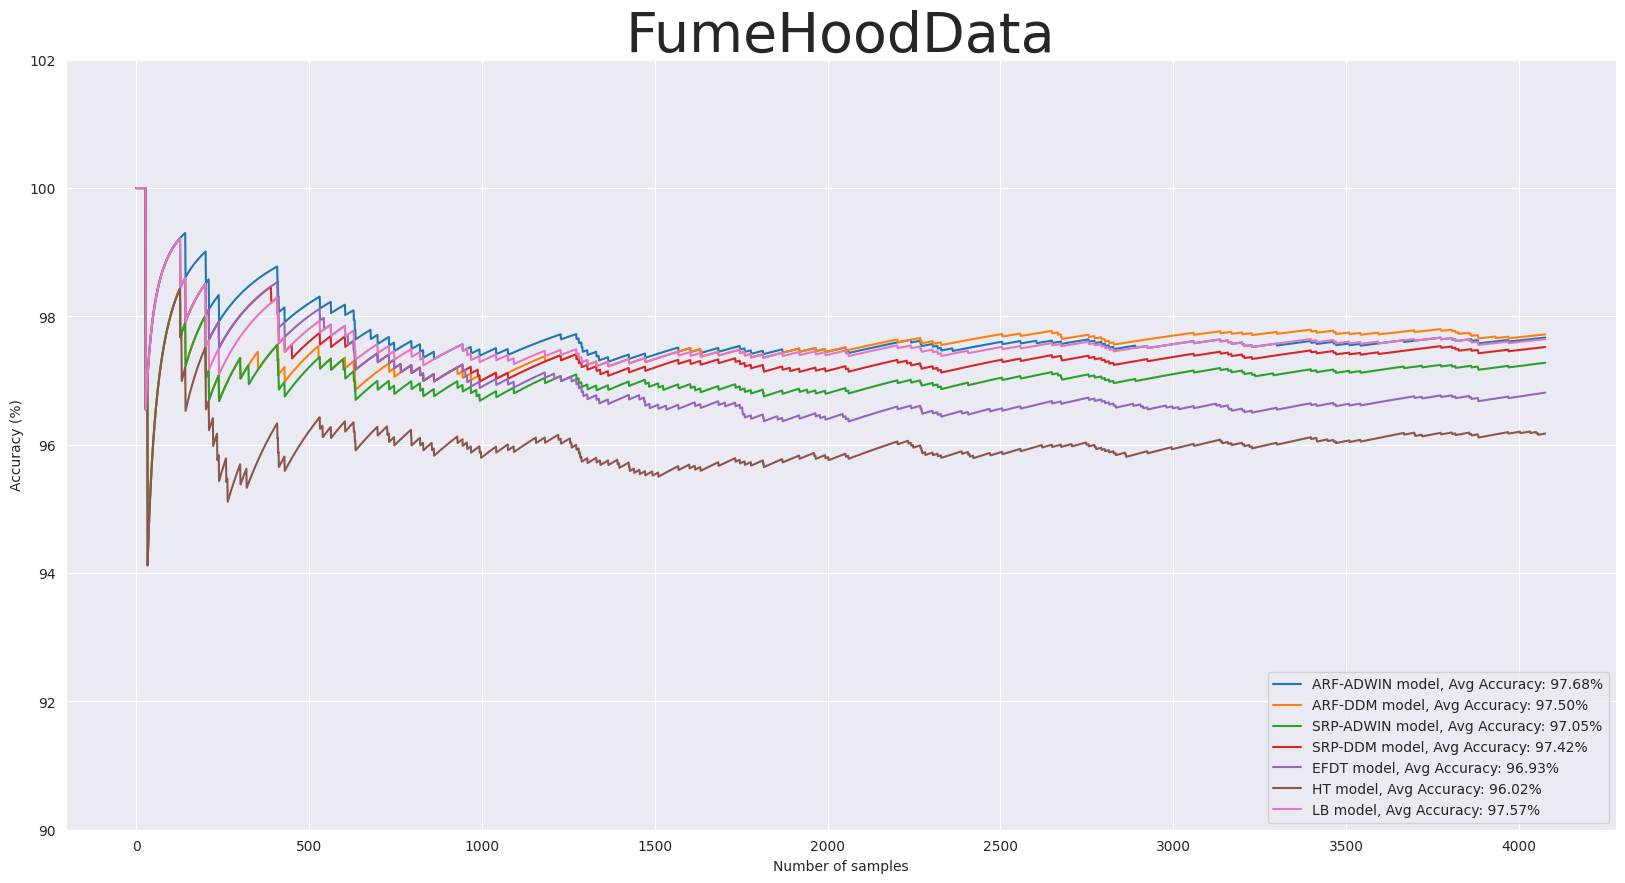

In [ ]:
train_and_plot_models(fumeHood_Data_w_anomalies, "FumeHoodData")